Contribution outline:
- We've all contributed equally on all parts of the project

In [1]:
%reset -f

In [2]:
#imports
import pandas as pd
import numpy as np
import nltk
import re
import os
from tqdm import tqdm, tqdm_pandas
#tqdm_pandas(tqdm())
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import matplotlib.pyplot as plt 
import matplotlib as mpl

def setup_mpl():
    mpl.rcParams['font.family'] = 'Times New Roman'
    return
setup_mpl()

# Text preprocessing

The preprocessing of the text is done through the Porter stemmer, which stems all words, i.e., converts words to their stem by removing common endings from words. Afterwards, any stopwords - the most common, non-meaningful words such as "a", "the", etc. - are removed, while any words containing non alphabetical characters are removed and urls are converted to the common string, "URL". 

In [3]:
# Preprocessing function

porter = nltk.PorterStemmer()
lancaster = nltk.LancasterStemmer()

# Keep numbers / Remove numbers / Substitute numbers with token


def preprocess(text):
    #Common english stop words
    stop_words = set(stopwords.words('english'))
    # Substituting urls with 
    url_regex = r'(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})'
    text = re.sub(r'http\S+', '#URL#', str(text)) # Maybe change to single-character-symbol -> shingles
    #Tokenize using nltk
    word_tokens = word_tokenize(text.lower())
    #removing none letter characters and stop words
    filtered_sentence = [w for w in word_tokens if w not in stop_words and w.isalpha()]
    #Conduct stemming
    processed_text = [porter.stem(t) for t in filtered_sentence]
    return processed_text

Then the clean CSV.-files are created, ready to be used for data analysis and as input to machine learning models. 

### SMS spam: 

In [4]:
PATH = "../data/regular/spam.csv"
SMS = pd.read_csv(PATH)[['v1','v2']]
SMS = SMS.rename(columns={'v1': 'label', 'v2': 'text'})

label = SMS['label'].values
text = SMS['text'].values

In [5]:
SMS['tokens'] = [preprocess(x) for x in tqdm(SMS['text'])]
SMS['str_tokens'] = [' '.join(x) for x in tqdm(SMS['tokens'])]
# Removing rows of emtpty tokens
SMS = SMS[SMS['tokens'].astype(bool)]
binary_dict = {'ham': 0, 'spam': 1}
SMS['binary'] = [binary_dict[x] for x in tqdm(SMS['label'])]
SMS.to_csv('../data/clean/clean_spam.csv', index=False)


100%|██████████| 5551/5551 [00:00<00:00, 1916735.12it/s]


### Email spam

In [6]:
PATH = "../data/regular/completeSpamAssassin.csv"
EMAIL = pd.read_csv(PATH, index_col = 'Unnamed: 0')

EMAIL.rename(columns = {'Label':'label', 'Body':'text'}, inplace = True)

EMAIL['label'] = EMAIL['label'].replace(0, 'ham')
EMAIL['label'] = EMAIL['label'].replace(1, 'spam')

# Removing 'empty' rows
EMAIL.text = np.where(EMAIL.text.isin(['empty']), np.nan, EMAIL.text)
EMAIL = EMAIL.dropna().reset_index().drop(columns=['index'])

In [7]:
EMAIL['tokens'] = [preprocess(x) for x in tqdm(EMAIL['text'])]
EMAIL['str_tokens'] = [' '.join(x) for x in tqdm(EMAIL['tokens'])]
EMAIL = EMAIL[EMAIL['tokens'].astype(bool)]
binary_dict = {'ham': 0, 'spam': 1}
EMAIL['binary'] = [binary_dict[x] for x in tqdm(EMAIL['label'])]
EMAIL.to_csv('../data/clean/clean_completeSpamAssassin.csv', index=False)

100%|██████████| 5507/5507 [00:00<00:00, 1938567.53it/s]


In [8]:
EMAIL

text label  \
0     \nSave up to 70% on Life Insurance.\nWhy Spend...  spam   
1     1) Fight The Risk of Cancer!\nhttp://www.adcli...  spam   
2     1) Fight The Risk of Cancer!\nhttp://www.adcli...  spam   
3     ##############################################...  spam   
4     I thought you might like these:\n1) Slim Down ...  spam   
...                                                 ...   ...   
5507  ----------------------------------------------...   ham   
5508  EFFector       Vol. 15, No. 35       November ...   ham   
5509  \nWe have extended our Free seat sale until Th...   ham   
5510                    ___           ___           ...   ham   
5511  IN THIS ISSUE:01. Readers write\n02. Extension...   ham   

                                                 tokens  \
0     [save, life, insur, spend, life, quot, save, e...   
1     [fight, risk, cancer, url, slim, guarante, los...   
2     [fight, risk, cancer, url, slim, guarante, los...   
3     [adult, club, offer, free, membership, instant...   
4     [thought, might, like, slim, guarante, lose, l...   
...                                                 ...   
5507  [isilo, tm, palm, os, pocket, pc, window, ente...   
5508  [effector, vol, novemb, ren, public, electron,...   
5509  [extend, free, seat, sale, thursday, novemb, d...   
5510  [insignific, matter, heavili, overemphasis, hu...   
5511  [reader, write, extens, search, dumb, messag, ...   

                                             str_tokens  binary  
0     save life insur spend life quot save ensur fam...       1  
1     fight risk cancer url slim guarante lose lb da...       1  
2     fight risk cancer url slim guarante lose lb da...       1  
3     adult club offer free membership instant acces...       1  
4     thought might like slim guarante lose lb day u...       1  
...                                                 ...     ...  
5507  isilo tm palm os pocket pc window enter isilo ...       0  
5508  effector vol novemb ren public electron fronti...       0  
5509  extend free seat sale thursday novemb detail s...       0  
5510  insignific matter heavili overemphasis hugh mt...       0  
5511  reader write extens search dumb messag revisit...       0  

[5507 rows x 5 columns]

Download of clean [CSV-files](https://we.tl/t-1A7Gx6rxG7)

# Data Analysis

In [9]:
%reset -f

#imports
import pandas as pd
import numpy as np
import nltk
import re
import os
from tqdm import tqdm, tqdm_pandas
#tqdm_pandas(tqdm())
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

## Sources
https://www.researchgate.net/figure/Average-daily-number-of-base-stations-visited-by-spammers-red-legitimate-customers_fig1_262330820
https://towardsdatascience.com/spam-detection-in-sms-messages-3322e03300f5


# Data Analysis

In [10]:
import matplotlib.pyplot as plt
import matplotlib as mpl

In [11]:
def setup_mpl():
    mpl.rcParams['font.family'] = 'Times New Roman'
    return
setup_mpl()

The following analysis will investigate the nature of the spam/ham dataset. More specifically, we will look into how long the typical SMS/email is for each group respectively. Subsequently, we will investigate the amount of spelling mistakes present in each group.

In [12]:
from ast import literal_eval

datasets = ['clean_spam.csv', 'clean_completeSpamAssassin.csv'] #, 'clean_Job_postings.csv', 'clean_NEWS.csv']

dfs = {'clean_spam.csv': {'data': [], 'spam': [], 'ham': [], 'type': 'SMS'},
       'clean_completeSpamAssassin.csv': {'data': [], 'spam': [], 'ham': [], 'type': 'E-mail'},
      }
       #'clean_Job_postings.csv': {'data': [], 'fraudulent': [], 'genuine': [], 'type': 'Job postings'},
       #'clean_NEWS.csv': {'data': [], 'fake': [], 'real': [], 'type': 'News'}}

for dataset in datasets:
    
    # read data
    df = pd.read_csv('../data/clean/' + dataset, encoding= "ISO-8859-1")

    df.tokens = df.tokens.apply(literal_eval)
    df['len'] = df.tokens.str.len()
    
    # Saving data, and the classes into dictionary
    dfs[dataset]['data'] = df
    dfs[dataset][list(dfs[dataset].keys())[1]] = df[df.label==list(dfs[dataset].keys())[1]]
    dfs[dataset][list(dfs[dataset].keys())[2]] = df[df.label==list(dfs[dataset].keys())[2]]

First let us investigate the proportion of ham and spam in the datasets:

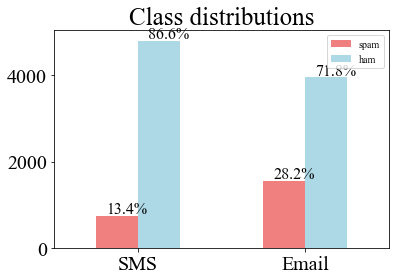

In [13]:
total = []
spam_counts = []
ham_counts = []
for i in range(2):
    total.append(dfs[datasets[i]]['data'].label.value_counts()[0] + dfs[datasets[i]]['data'].label.value_counts()[1])
    spam_counts.append(dfs[datasets[i]]['data'].label.value_counts()[1])
    ham_counts.append(dfs[datasets[i]]['data'].label.value_counts()[0])    
    
from matplotlib.pyplot import figure

# figure(figsize=(20, 10), dpi=100)
plt.rcParams["figure.figsize"] = [10,5]
plt.rcParams["figure.dpi"] = 100


index = ['SMS', 'Email']
df = pd.DataFrame({'spam': spam_counts, 'ham': ham_counts}, index=index)
ax = df.plot.bar(rot=0, color=['lightcoral', 'lightblue'])
       
for i, p in enumerate(ax.patches):
    percentage = '{:.1f}%'.format(100 * p.get_height()/total[i%2])
    x = p.get_x() + p.get_width() / 4
    y = p.get_y() + p.get_height() + 60
    ax.annotate(percentage, (x, y), fontsize = 16)  
    ax.tick_params(axis='x', which='both', labelsize=20)
    ax.tick_params(axis='y', which='both', labelsize=20)  
    
plt.title('Class distributions', size = 25)
plt.show()


Getting actual counts of classes

In [14]:
for dataset in datasets:
    print('Dataset:', dataset)
    print(dfs[dataset]['data'].label.value_counts(), "\n")

Dataset: clean_spam.csv
ham     4805
spam     746
Name: label, dtype: int64 

Dataset: clean_completeSpamAssassin.csv
ham     3952
spam    1555
Name: label, dtype: int64 



In [15]:
print("Total observations SMS", 4825 + 747) #5572
print("Total observations Email", 3952 + 1560) # 5512


Total observations SMS 5572
Total observations Email 5512


Notably, the dataset illustrated a significant class imbalance, which would probably have to be taken into account when training models for classification.

The following will analyse the length distribution of spam and ham mails:

Checking for log normality in the text length through Q-Q plots. 

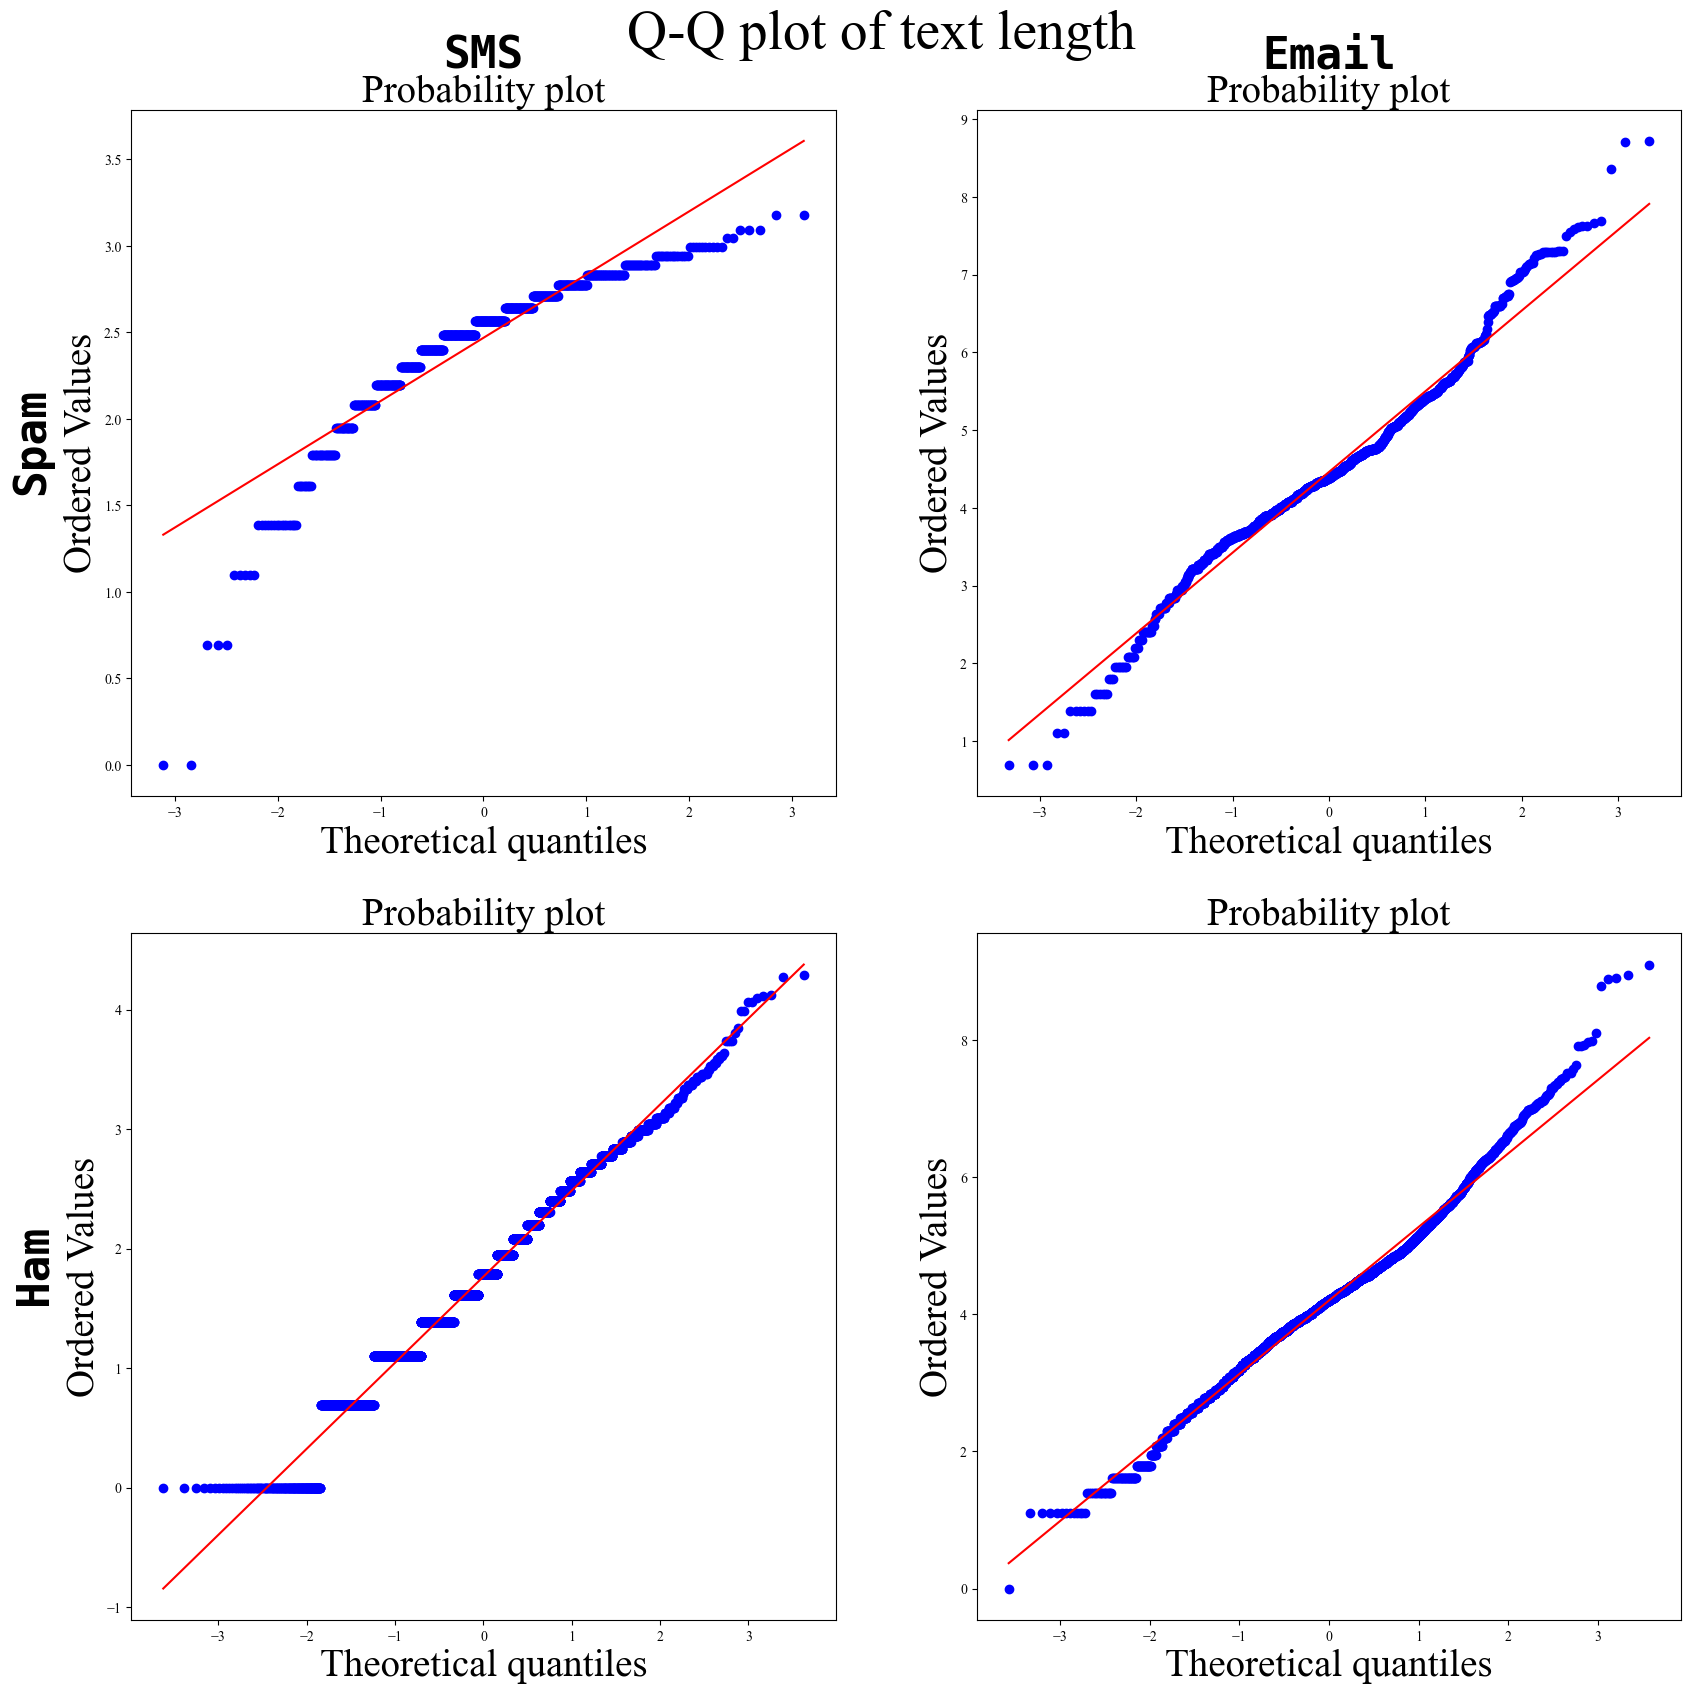

In [16]:
import pylab
import scipy.stats


def add_headers(
    fig,
    *,
    row_headers=None,
    col_headers=None,
    row_pad=1,
    col_pad=5,
    rotate_row_headers=True,
    **text_kwargs
):
    # Based on https://stackoverflow.com/a/25814386

    axes = fig.get_axes()

    for ax in axes:
        sbs = ax.get_subplotspec()

        # Putting headers on cols
        if (col_headers is not None) and sbs.is_first_row():
            ax.annotate(
                col_headers[sbs.colspan.start],
                xy=(0.5, 1.05),
                xytext=(0, col_pad),
                xycoords="axes fraction",
                textcoords="offset points",
                ha="center",
                va="baseline",
                **text_kwargs,
            )

        # Putting headers on rows
        if (row_headers is not None) and sbs.is_first_col():
            ax.annotate(
                row_headers[sbs.rowspan.start],
                xy=(-0.1, 0.55),
                xytext=(-ax.yaxis.labelpad - row_pad, 0),
                xycoords=ax.yaxis.label,
                textcoords="offset points",
                ha="right",
                va="center",
                rotation=rotate_row_headers * 90,
                **text_kwargs,
            )

fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize=(20, 20), dpi=100)

datasets = ['clean_spam.csv', 'clean_completeSpamAssassin.csv']*2
label = ['spam', 'spam', 'ham', 'ham']

col_headers = ['SMS', 'Email']
row_headers = ['Spam', 'Ham']


for i, ax in enumerate(axs.flat):
    measurements = np.log(list(dfs[datasets[i]][label[i]].len.values))
    scipy.stats.probplot(measurements, dist="norm", plot=ax)
    ax.set_title("Probability plot", fontsize = 28)
    ax.set_xlabel("Theoretical quantiles", fontsize=28)
    ax.set_ylabel("Ordered Values", fontsize=28)


font_kwargs = dict(fontfamily="monospace", fontweight="bold", size=32)
add_headers(fig, col_headers=col_headers, row_headers=row_headers, **font_kwargs)

fig.suptitle('Q-Q plot of text length', size = 40, y=0.93)
plt.show()

Since the observations in the Email dataset follow the red line quite nicely, the distribution is said to follow a log normal distribution. Thus the email dataset will be plotted in log-scale in the following plots.

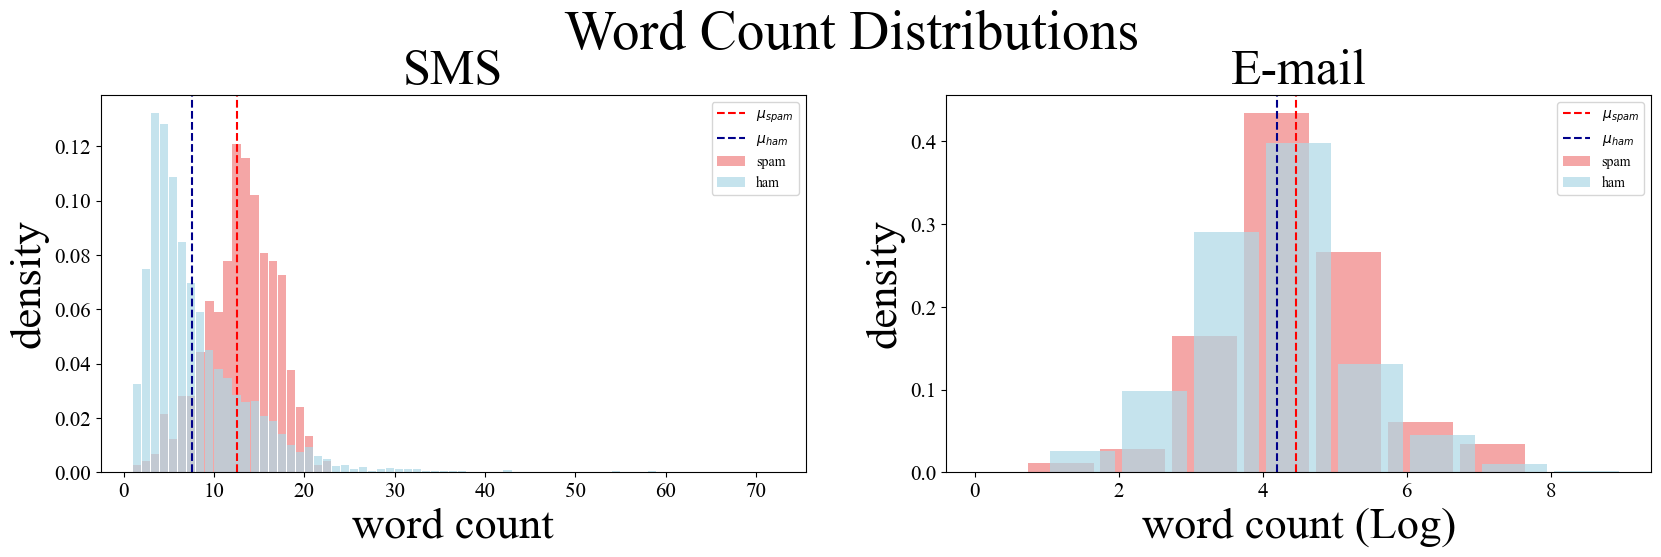

In [17]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(20, 5), dpi=100)
fig.subplots_adjust(hspace=0.3)

spam_lens = []
ham_lens = []


for i, ax in enumerate(axs.flat):

    # Accessing correct dataset, and getting word count 
    
    spam_label = list(dfs[datasets[i]].keys())[1]
    ham_label = list(dfs[datasets[i]].keys())[2]
    
    
    if i == 1:
        spam_len = np.log(list(dfs[datasets[i]][spam_label].len.values))
        ham_len = np.log(list(dfs[datasets[i]][ham_label].len.values))
    else:
        spam_len = list(dfs[datasets[i]][spam_label].len.values)
        ham_len = list(dfs[datasets[i]][ham_label].len.values)
        
    spam_lens.append(spam_len)
    ham_lens.append(ham_len)

    bins = np.arange(min(spam_len), max(spam_len), 1)
    hist, edges = np.histogram(spam_len, bins=bins, density=True)
    x = (edges[1:] + edges[:-1])/2
    width = bins[1]-bins[0]

    ax.bar(x, hist, width=width*0.91, color='lightcoral', label=spam_label, alpha=0.7)
    ax.set_ylabel("counts")
    ax.set_xlabel("k")
    ax.set_title("")
    
    ax.axvline(np.mean(spam_len), c='red', label='$\mu_{'+spam_label+'}$', linestyle='dashed')
    ax.axvline(np.mean(ham_len), c='darkblue', label='$\mu_{'+ham_label+'}$', linestyle='dashed')

    bins = np.arange(min(ham_len), max(ham_len), 1)
    hist, edges = np.histogram(ham_len, bins=bins, density=True)
    x = (edges[1:] + edges[:-1])/2
    width = bins[1]-bins[0]
    ax.bar(x, hist, width=width*0.90, color='lightblue', label=ham_label, alpha=0.7)
    ax.tick_params(axis='x', which='both', labelsize=15)
    ax.tick_params(axis='y', which='both', labelsize=15)    

    ax.legend()
    ax.set_ylabel("density", fontsize = 32)
    
    if str(dfs[datasets[i]]['type']) == 'E-mail':
        ax.set_xlabel("word count (Log)", fontsize = 32)
    
    else: 
        ax.set_xlabel("word count", fontsize = 32)
    
    ax.set_title(str(dfs[datasets[i]]['type']), fontsize = 36) #TODO: maybe change to number of words
    
  

plt.suptitle("Word Count Distributions", fontsize = 40, y=1.05)
plt.show()

By visually inspecting the above figure, it appears that spam SMSes tend to have longer content than ham SMSes.
Visually, it is difficult to tell with the other datasets, the following will print the mean and standard deviations useed to create the plots:

In [18]:
for i, dataset in enumerate(datasets[:2]):
    
    print('Dataset:', dataset)
    print()
    print(f'Mean of spam: {np.mean(spam_lens[i])}')
    print(f'Standard deviation of spam: {np.std(spam_lens[i])}')
    print()
    print(f'Mean of ham: {np.mean(ham_lens[i])}')
    print(f'Standard deviation of ham: {np.std(ham_lens[i])}')
    print()
    print()

Dataset: clean_spam.csv

Mean of spam: 12.57372654155496
Standard deviation of spam: 3.8609277108605977

Mean of ham: 7.56108220603538
Standard deviation of ham: 6.004461095151682


Dataset: clean_completeSpamAssassin.csv

Mean of spam: 4.460125620197719
Standard deviation of spam: 1.0482585579346877

Mean of ham: 4.199805870951014
Standard deviation of ham: 1.0770224601413823




Clearly SMSes are of much smaller word count than Emails, not surprisingly, as SMSes tend to be less formal than the written text contained in the other datasets.

Interestingly, the word count of emails have a much higher standard deviation than SMS messages.

The mean and standard deviations within the datasets, do not seem to depend much on whether the text contains spam or ham.

## Spelling mistakes

Furthermore, the following will investigate the proportion of spelling mistakes in each group respectively.

In [19]:
from spellchecker import SpellChecker
import re
import nltk
from tqdm import tqdm

tqdm.pandas()
spell = SpellChecker()

def find_misspelled(row, spell):

    text = row.text.lower()
    words = nltk.tokenize.word_tokenize(text)

    misspelled = [word for word in spell.unknown(words) if str(word) not in ['nan']]
    return misspelled

Finding all misspelled words, and the ratio of which words in a sentence are misspelled. 

In [20]:
spell = SpellChecker()

for dataset in datasets[:2]:
    dfs[dataset]['data']['misspelled'] = dfs[dataset]['data'].progress_apply(lambda row: find_misspelled(row, spell), axis=1)
    dfs[dataset]['data']['misspelled_size'] = dfs[dataset]['data']['misspelled'].apply(lambda x: len(x))

    # Ratio of misspelled words
    dfs[dataset]['data']['misspell_ratio'] = dfs[dataset]['data']['misspelled_size'] / dfs[dataset]['data']['len']
    
    # Saving dataframe per class again
    dfs[dataset][list(dfs[dataset].keys())[1]] = dfs[dataset]['data'][dfs[dataset]['data']['label'] == list(dfs[dataset].keys())[1]]
    dfs[dataset][list(dfs[dataset].keys())[2]] = dfs[dataset]['data'][dfs[dataset]['data']['label'] == list(dfs[dataset].keys())[2]]    

100%|██████████| 5507/5507 [00:16<00:00, 333.01it/s]


In [21]:
# Ratio in total data:
for dataset in datasets[:2]:
    
    print("Total ratio of spam misspellings in", dataset+":", np.sum(dfs[dataset]['spam']['misspelled_size']) / np.sum(dfs[dataset]['spam']['len']))
    print("Total ratio of ham misspellings in", dataset+":", np.sum(dfs[dataset]['ham']['misspelled_size']) / np.sum(dfs[dataset]['ham']['len']))    

Total ratio of spam misspellings in clean_spam.csv: 0.3549040511727079
Total ratio of ham misspellings in clean_spam.csv: 0.24040075968181443
Total ratio of spam misspellings in clean_completeSpamAssassin.csv: 0.1577784753467499
Total ratio of ham misspellings in clean_completeSpamAssassin.csv: 0.21005309046714657


Once again doing Q-Q plots, this time for the misspelling count within data sets.

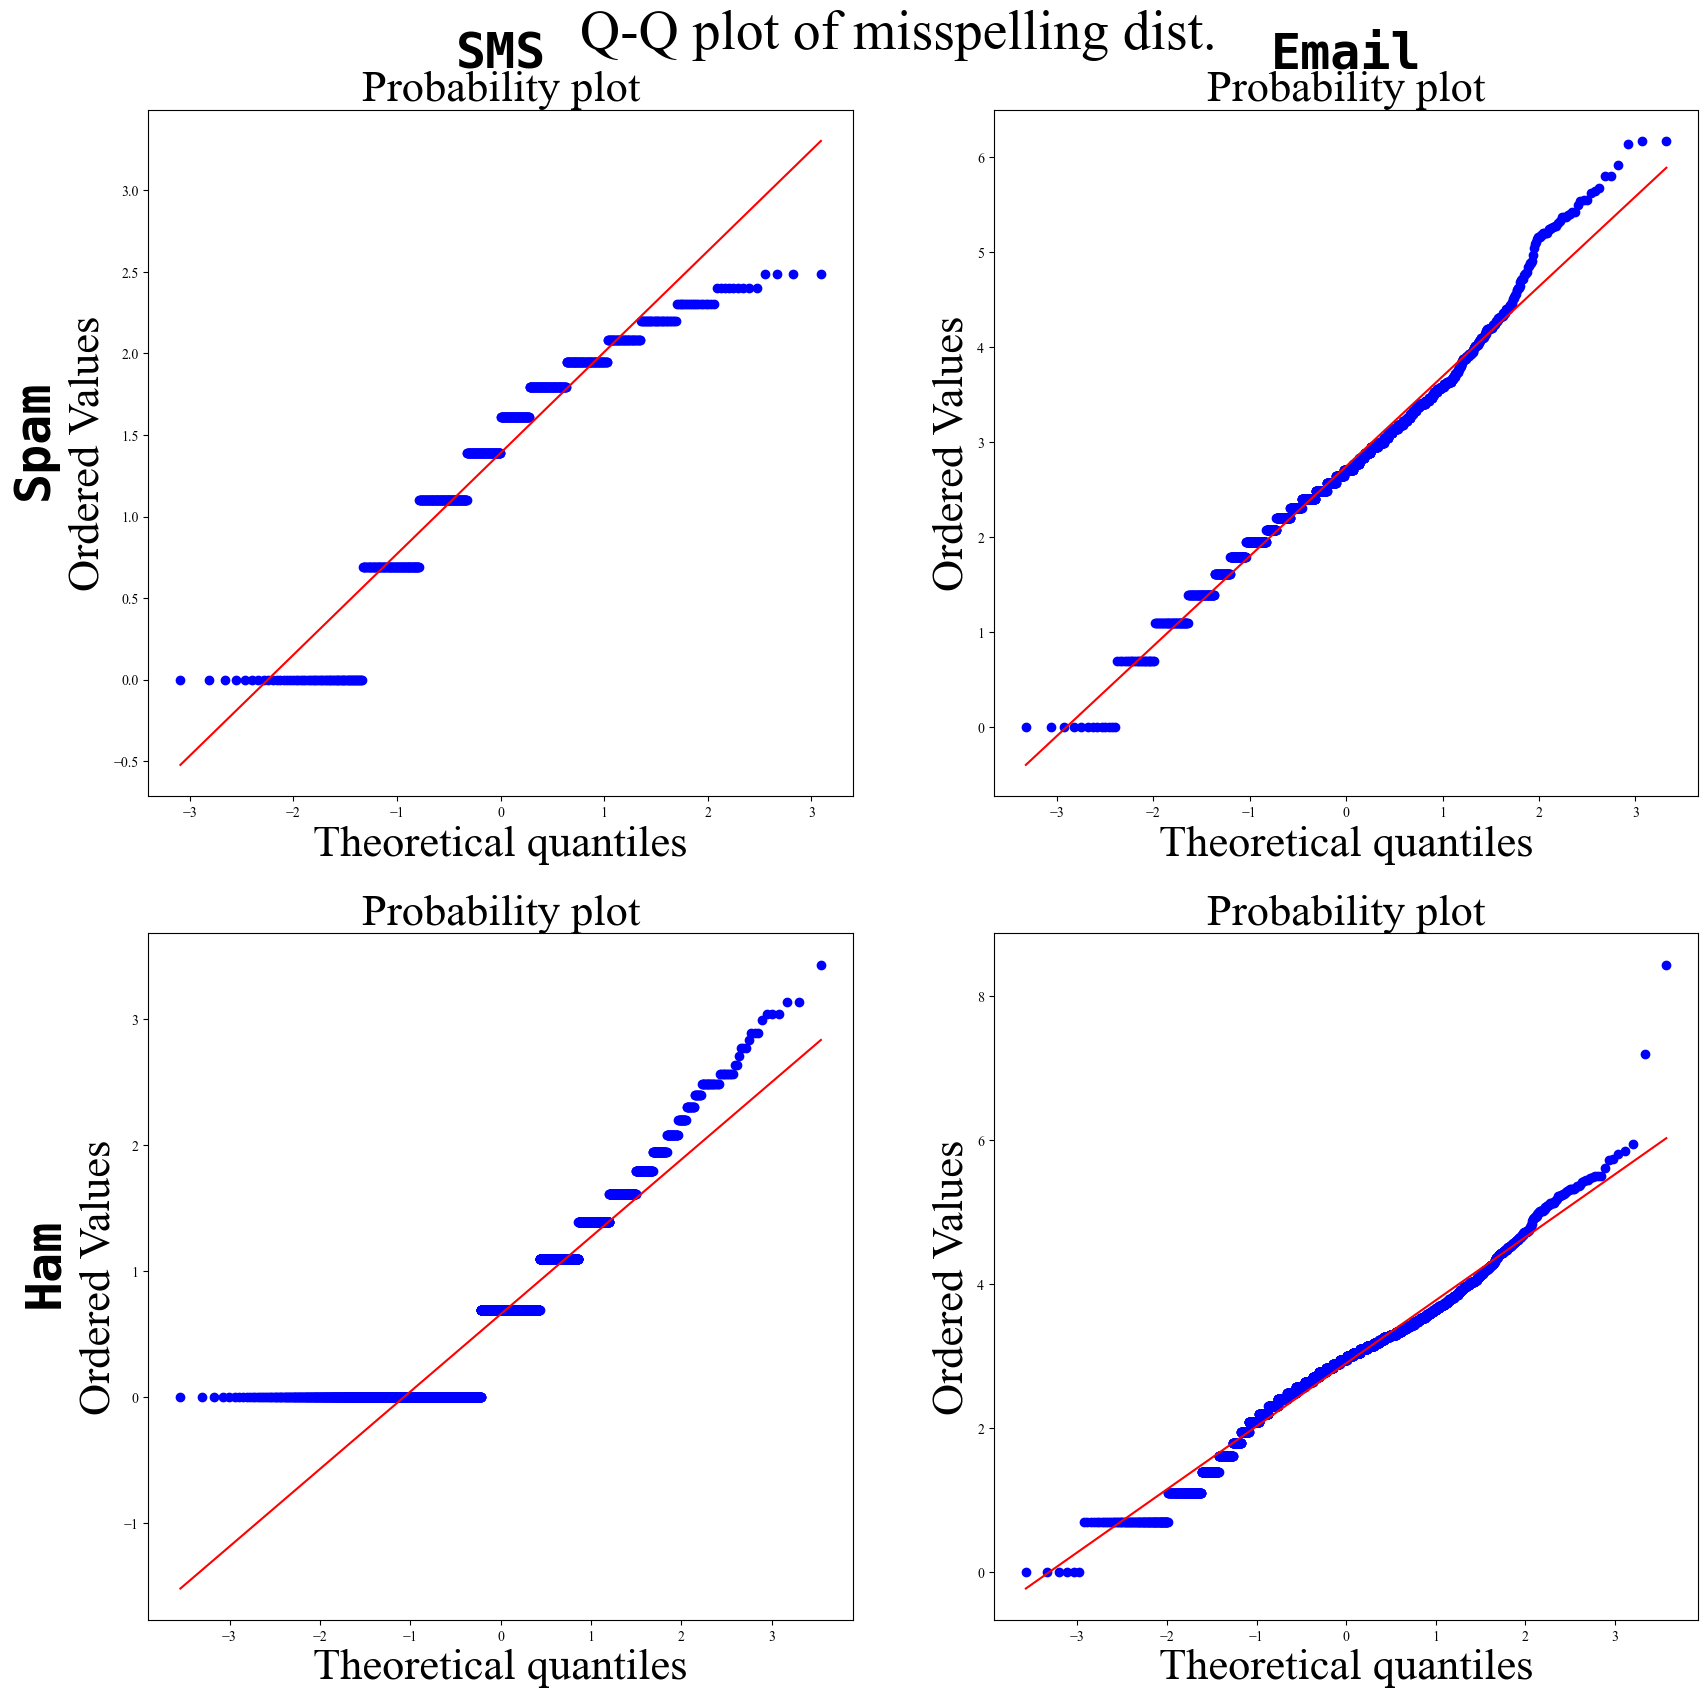

In [22]:
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize=(20, 20), dpi=100)

datasets = ['clean_spam.csv', 'clean_completeSpamAssassin.csv']*2
label = ['spam', 'spam', 'ham', 'ham']

col_headers = ['SMS', 'Email']
row_headers = ['Spam', 'Ham']


for i, ax in enumerate(axs.flat):
    lst = np.array(dfs[datasets[i]][label[i]].misspelled_size.values)
    measurements = np.log(lst[lst != 0])
    scipy.stats.probplot(measurements, dist="norm", plot=ax)
    ax.set_title("Probability plot", fontsize = 32)
    ax.set_xlabel("Theoretical quantiles", fontsize=32)
    ax.set_ylabel("Ordered Values", fontsize=32)


font_kwargs = dict(fontfamily="monospace", fontweight="bold", size = 36)
add_headers(fig, col_headers=col_headers, row_headers=row_headers, **font_kwargs)

fig.suptitle('Q-Q plot of misspelling dist.', size = 40, y=0.93)
plt.show()

As is seen, the email dataset once again follows a log normal distribution, thus when plotting the log-scale is used for easier visualization. 

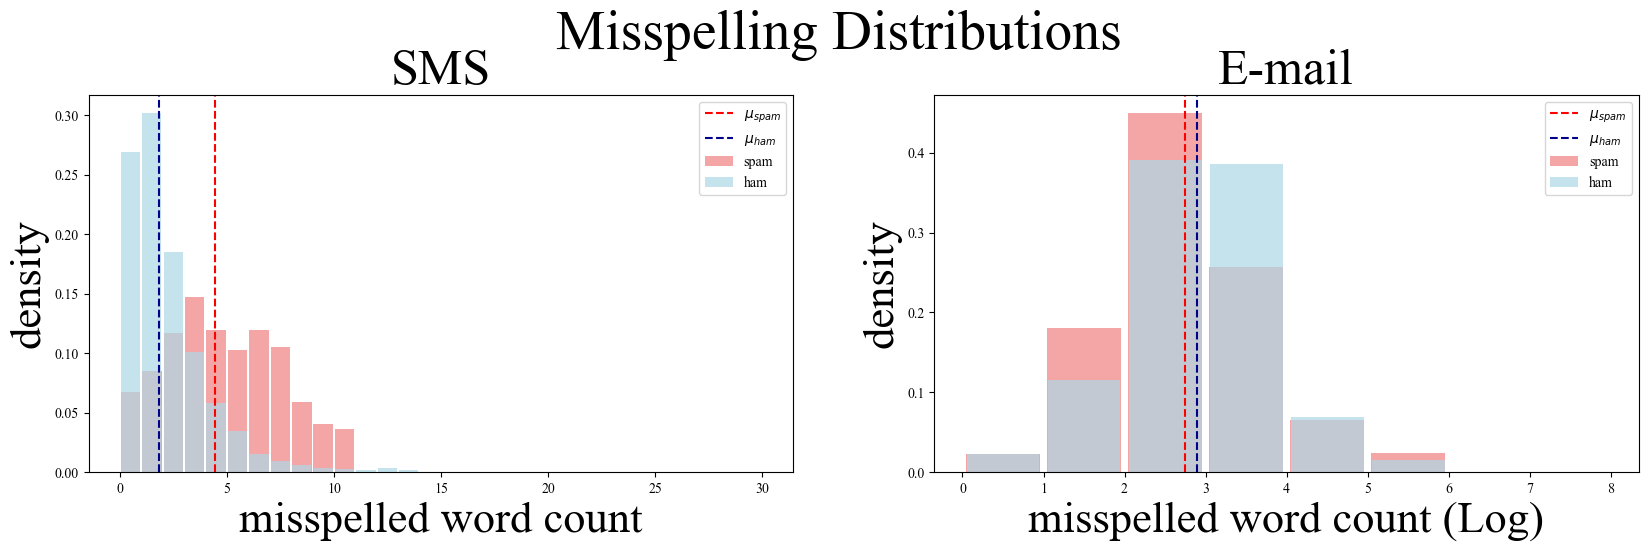

In [23]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(20,5), dpi=100)
fig.subplots_adjust(hspace=0.3)

spam_lens = []
ham_lens = []

for i, ax in enumerate(axs.flat):

    spam_label = list(dfs[datasets[i]].keys())[1]
    ham_label = list(dfs[datasets[i]].keys())[2]

    if i == 1:
        lst = np.array(dfs[datasets[i]][spam_label].misspelled_size.values)
        spam_len = np.log(lst[lst != 0])
        lst = np.array(dfs[datasets[i]][ham_label].misspelled_size.values)
        ham_len = np.log(lst[lst != 0])
    else:
        spam_len = list(dfs[datasets[i]][spam_label].misspelled_size.values)
        ham_len = list(dfs[datasets[i]][ham_label].misspelled_size.values)
    
    spam_lens.append(spam_len)
    ham_lens.append(ham_len)

    bins = np.arange(min(spam_len), max(spam_len), 1)
    hist, edges = np.histogram(spam_len, bins=bins, density=True)
    x = (edges[1:] + edges[:-1])/2
    width = bins[1]-bins[0]

    # fig, ax = plt.subplots(1, figsize=(10,5), dpi=100)
    ax.bar(x, hist, width=width*0.91, color='lightcoral', label=spam_label, alpha=0.7)
    ax.set_ylabel("counts")
    ax.set_xlabel("k")
    ax.set_title("")

    ax.axvline(np.mean(spam_len), c='red', label='$\mu_{'+spam_label+'}$', linestyle='dashed')
    ax.axvline(np.mean(ham_len), c='darkblue', label='$\mu_{'+ham_label+'}$', linestyle='dashed')

    bins = np.arange(min(ham_len), max(ham_len), 1)
    hist, edges = np.histogram(ham_len, bins=bins, density=True)
    x = (edges[1:] + edges[:-1])/2
    width = bins[1]-bins[0]
    ax.bar(x, hist, width=width*0.90, color='lightblue', label=ham_label, alpha=0.7)

    ax.legend()
    ax.set_ylabel("density")
    ax.set_xlabel("Misspelled words")
    ax.set_title("Misspelling Distribution")
    
    ax.set_ylabel("density", fontsize = 32)
    if str(dfs[datasets[i]]['type']) == 'E-mail':
        ax.set_xlabel("misspelled word count (Log)", fontsize = 32)
        
    else: 
        ax.set_xlabel("misspelled word count", fontsize = 32)
        
    ax.set_title(str(dfs[datasets[i]]['type']), fontsize = 36) #TODO: maybe change to number of words

plt.suptitle("Misspelling Distributions", fontsize = 40, y=1.05)    

plt.show()



Descriptive statistics: 

In [24]:
for i, dataset in enumerate(datasets[:2]):
    
    print('Dataset:', dataset)
    print()
    print(f'Mean of spam: {np.mean(spam_lens[i])}')
    print(f'Standard deviation of spam: {np.std(spam_lens[i])}')
    print()
    print(f'Mean of ham: {np.mean(ham_lens[i])}')
    print(f'Standard deviation of ham: {np.std(ham_lens[i])}')
    print()
    print()

Dataset: clean_spam.csv

Mean of spam: 4.462466487935657
Standard deviation of spam: 2.7392120992139612

Mean of ham: 1.8176899063475547
Standard deviation of ham: 2.2240898643853617


Dataset: clean_completeSpamAssassin.csv

Mean of spam: 2.7455058294933132
Standard deviation of spam: 0.9522189031917235

Mean of ham: 2.8965008912677277
Standard deviation of ham: 0.8832954856919721




The following section will analyse the most commonly misspelled words within each category, in order to create word clouds. 

In [25]:
spam_freq_dist = {}
ham_freq_dist = {}

for ds in datasets[:2]:
    spam_label = list(dfs[ds].keys())[1]
    ham_label = list(dfs[ds].keys())[2]
    spam_freq_dist[ds] = nltk.FreqDist(dfs[ds][spam_label].misspelled.explode().values)
    ham_freq_dist[ds] = nltk.FreqDist(dfs[ds][ham_label].misspelled.explode().values)


In [26]:
for (key, value) in spam_freq_dist.items():
    spam_freq_dist[key] = {k: v for k, v in sorted(value.items(), key=lambda item: item[1], reverse=True)  if not type(k) == float}

for (key, value) in ham_freq_dist.items():
    ham_freq_dist[key] = {k: v for k, v in sorted(value.items(), key=lambda item: item[1], reverse=True)  if not type(k) == float}



In [27]:
mpl.rcParams.update(
    {
        'text.usetex': False,
        'font.family': 'stixgeneral',
        'mathtext.fontset': 'stix',
    }
)

Now plotting the most frequently misspelled words.

In [28]:
list(dfs[datasets[i]].keys())[1]

'spam'

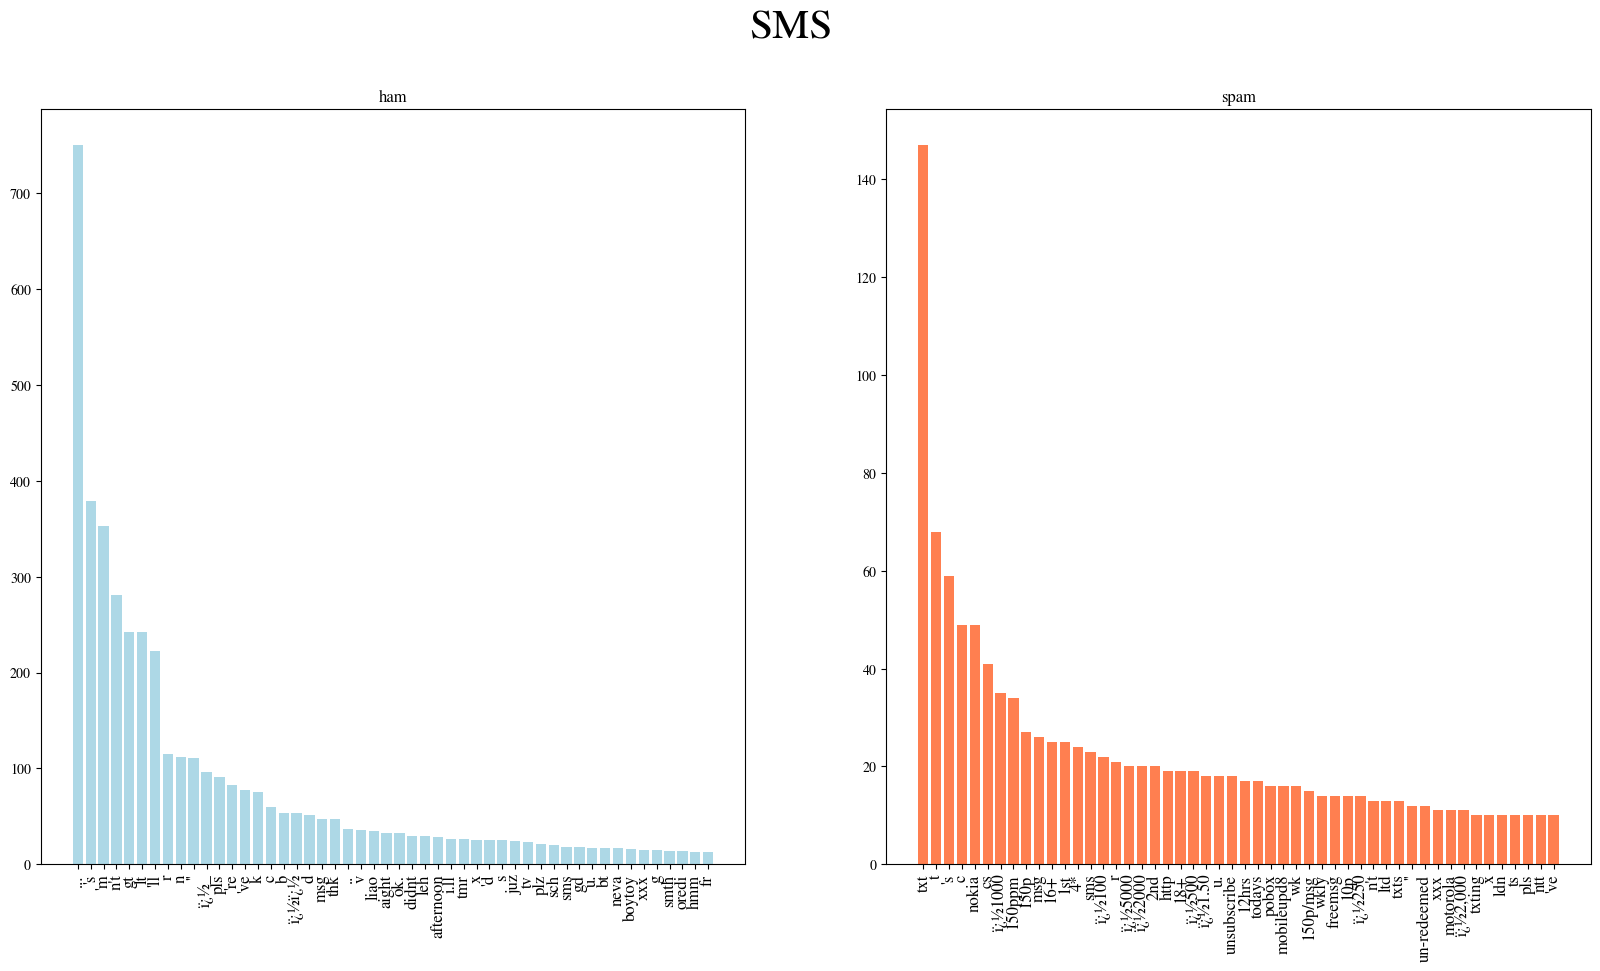

<ipython-input-29-80e1c21464f2>:19: UserWarning: Glyph 130 (\x82) missing from current font.
  plt.savefig('wordfreq_'+dfs[ds]['type']+'.png')
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


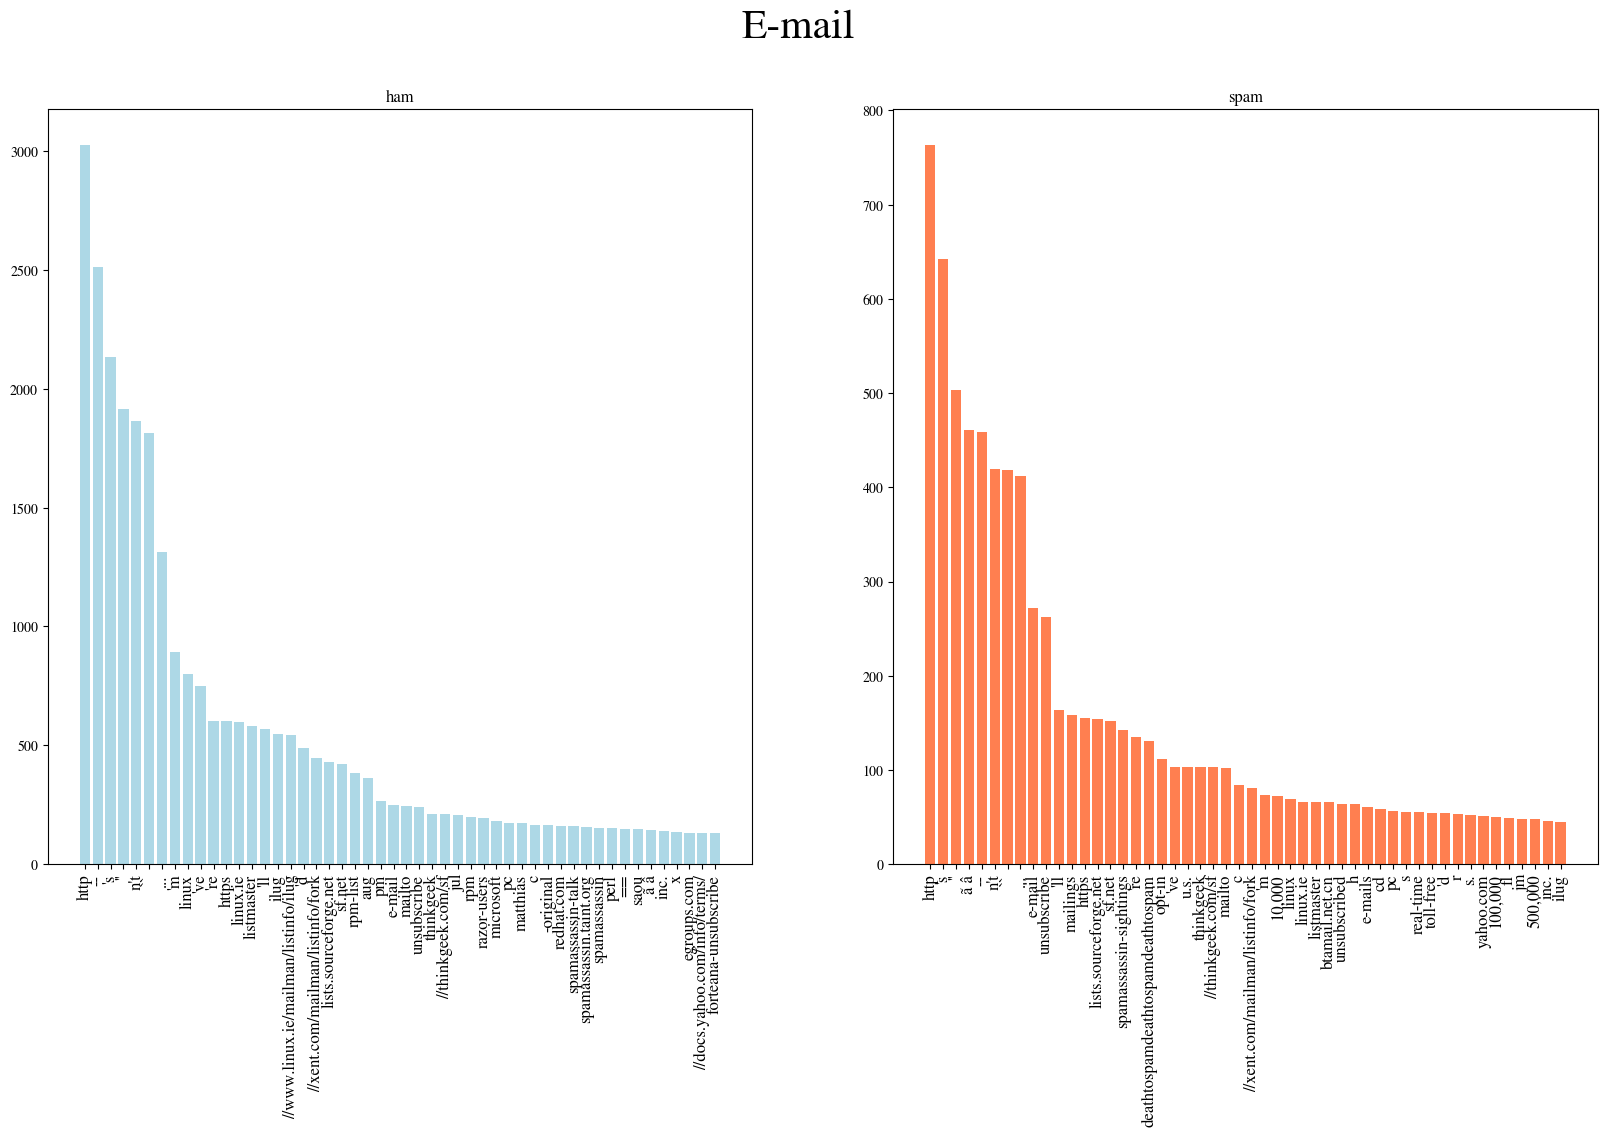

In [29]:
k=50

for ds in datasets[:2]:    

    fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(20,10),dpi=100)
    
    spam_ham = [ham_freq_dist[ds], spam_freq_dist[ds]]
    labels = [list(dfs[datasets[i]].keys())[2], list(dfs[datasets[i]].keys())[1]]
    colors = ['lightblue', 'coral']

    for i, ax in enumerate(axs.flat):

        ax.bar(list(spam_ham[i].keys())[:k], list(spam_ham[i].values())[:k], color=colors[i])
        ax.title.set_text(labels[i])
        ax.tick_params(axis="x", labelsize=12, rotation=90)
        
    fig.suptitle(dfs[ds]['type'], fontsize=30)
    
    plt.savefig('wordfreq_'+dfs[ds]['type']+'.png')
    plt.show()

And finally the word clouds. Each word-cloud is colored according to the spam/ham category. 

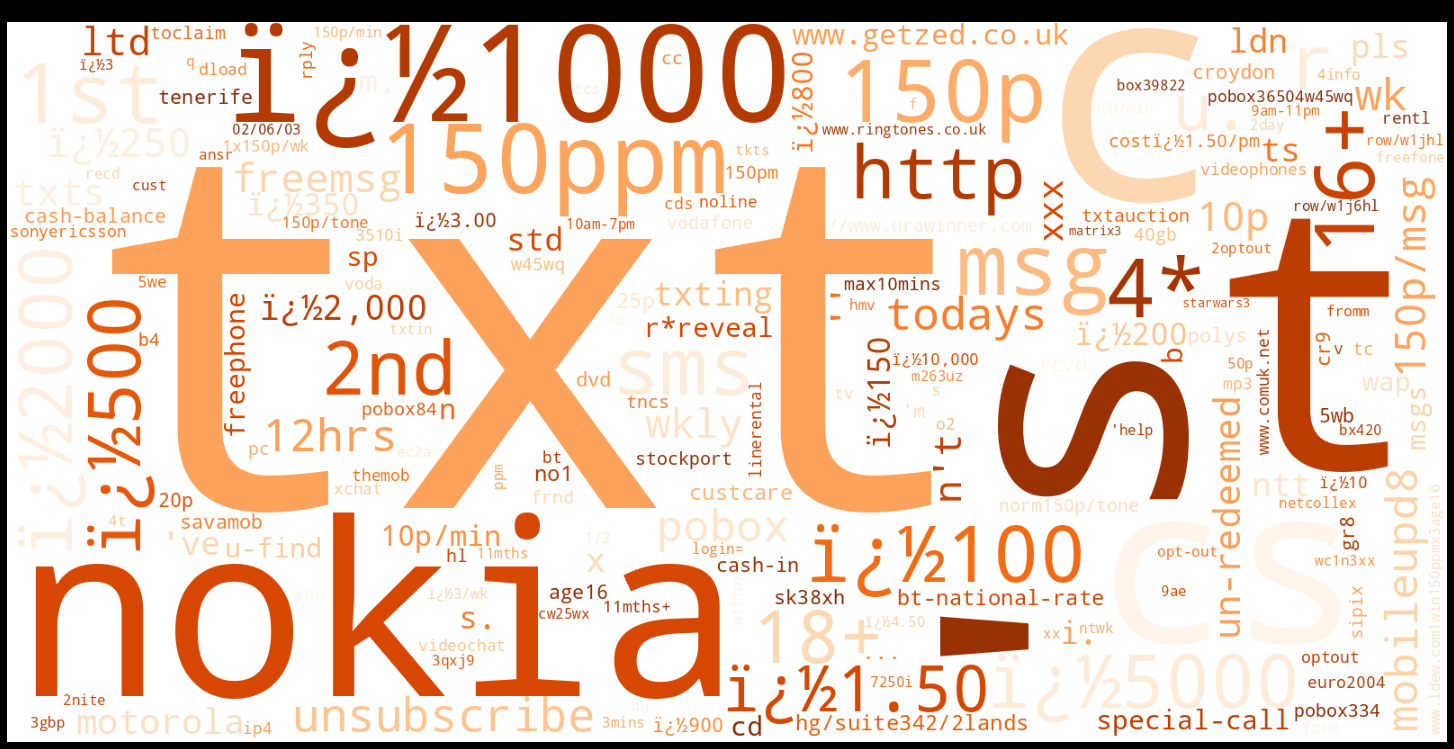

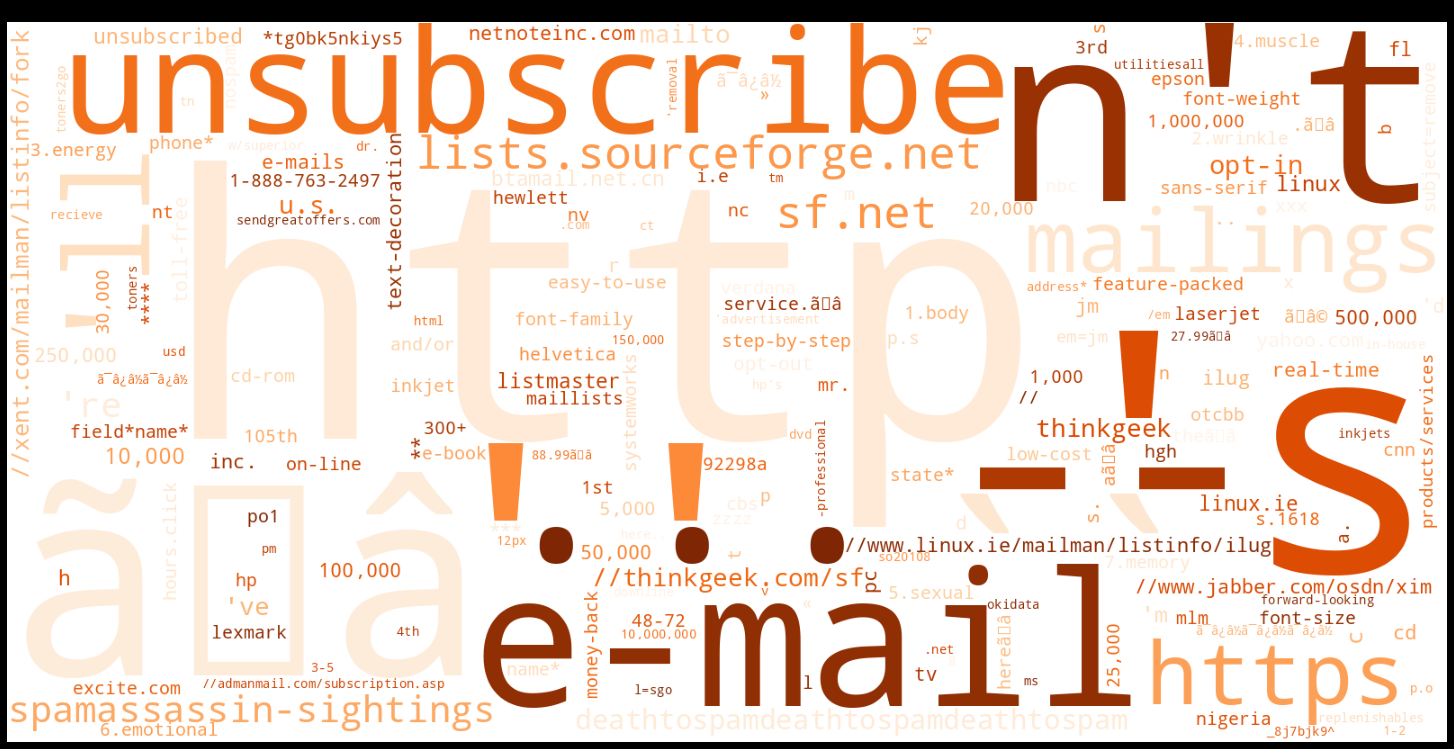

In [30]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(background_color="white", width=1600, height=800, colormap="Oranges")

for ds in datasets[:2]:
    spam_cloud = wordcloud.generate_from_frequencies(frequencies=spam_freq_dist[ds])

    plt.figure( figsize=(20,10), facecolor='k')
    plt.imshow(spam_cloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.title('Misspelled words (spam)')
    plt.savefig('misspell_spam_'+dfs[ds]['type']+'.png')
    plt.show()

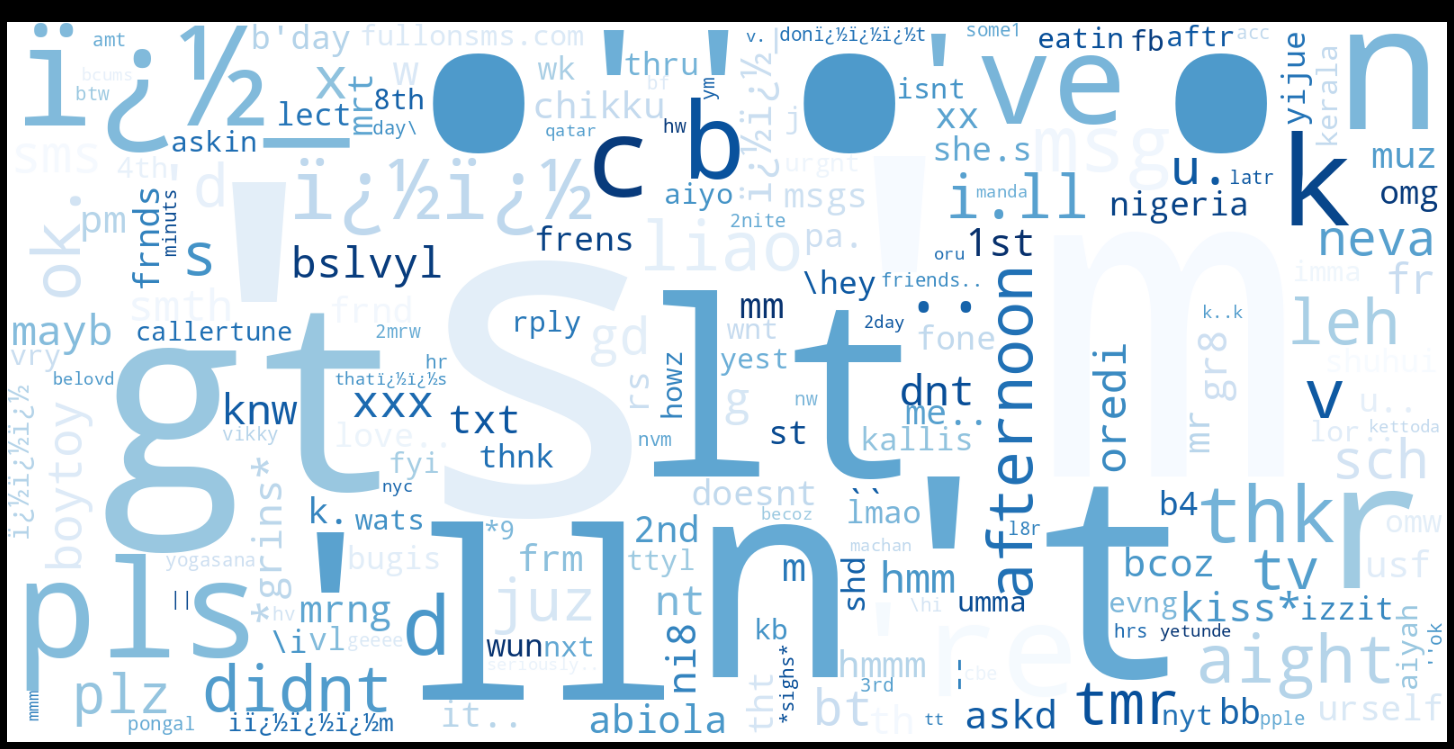

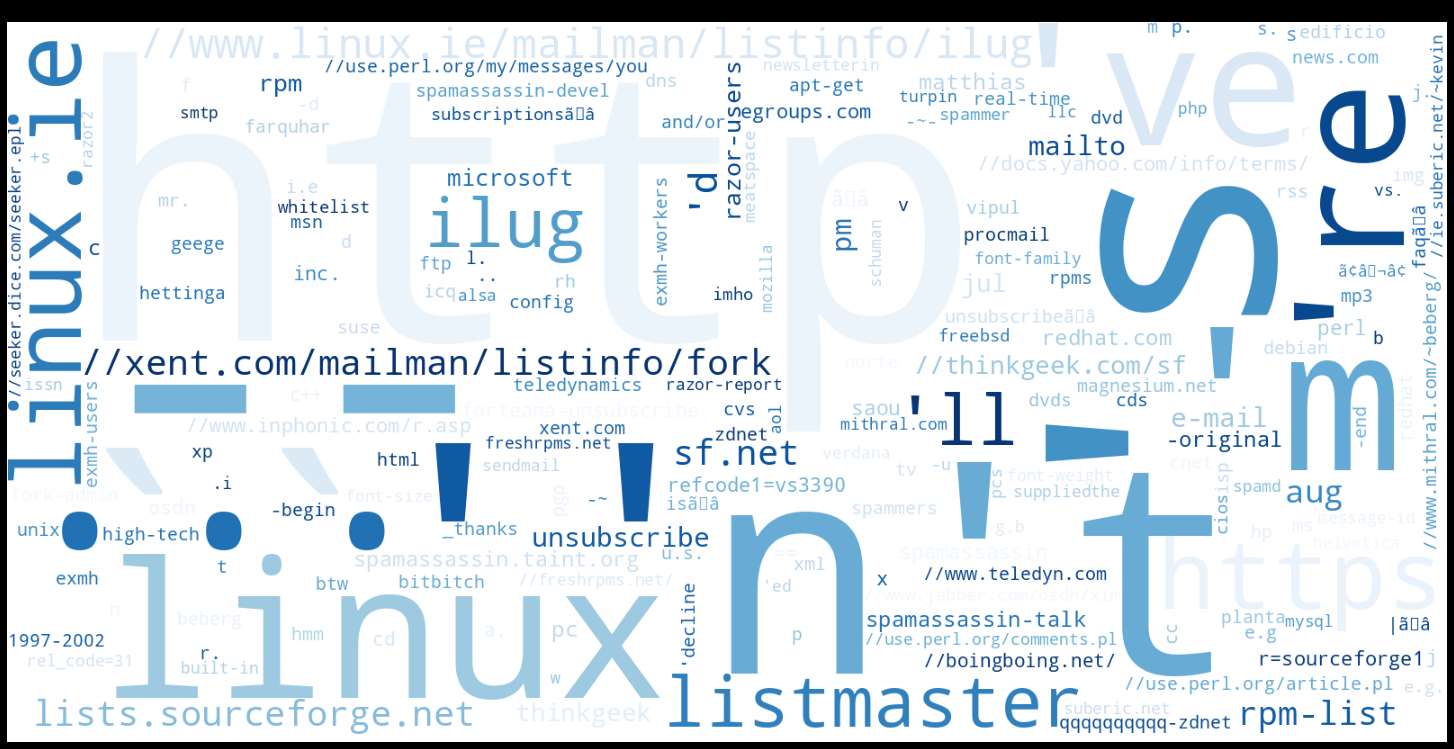

In [31]:
wordcloud = WordCloud(background_color="white", width=1600, height=800, colormap="Blues")

for ds in datasets[:2]:
    ham_cloud = wordcloud.generate_from_frequencies(frequencies=ham_freq_dist[ds])

    plt.figure( figsize=(20,10), facecolor='k')
    plt.imshow(ham_cloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.title('Misspelled words (ham)')
    plt.savefig('misspell_ham_'+dfs[ds]['type']+'.png')
    plt.show()

# The supervised models

The following models:

- Jaccard KNN
- TF-IDF KNN
- TF-IDF NB

In [32]:
# resetting all parameters
%reset -f

## Initializing

In [33]:
import pandas as pd
import numpy as np
import math
from sklearn.feature_extraction.text import CountVectorizer
from mlxtend.frequent_patterns import apriori
from sklearn.model_selection import RepeatedKFold, KFold, train_test_split
from sklearn.metrics import f1_score, accuracy_score
import time
from mlxtend.preprocessing import TransactionEncoder

from ast import literal_eval
from tqdm import tqdm
import mmh3
from itertools import product
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
import scipy.stats

seed = 42


### training function for TF-IDF models

In [34]:

#TDIDF
def identity_tokenizer(text):
    return text

def train(model, model_name, dataset, df_results, seed):
    # data
    #dataset = 'clean_completeSpamAssassin'
    #dataset = 'clean_spam'

    if dataset == 'clean_spam':
        new_dataset_name = 'SMS'
        min_df = 1
    else:
        new_dataset_name = 'Emails'
        min_df = 0.001
    # clean_completeSpamAssassin
    # clean_spam
    data = pd.read_csv(f'../data/clean/{dataset}.csv', encoding='latin')
    data.tokens = data.tokens.apply(literal_eval)

    df_text_tokenized = {i: [data['text'][i].split(' ')] for i in list(data.index)}
    data['text_tokenized'] = pd.DataFrame.from_dict(df_text_tokenized, orient='index')


    look_up_for_look_ups = ['raw/BOW', 'raw/Q', 'prep/BOW', 'prep/Q']
    look_ups = ['text_tokenized', 'text', 'tokens', 'str_tokens']
    dims = {}

    #print(f'Model: {model_name}')

    for idx, look_up in enumerate(look_ups):
        labels = ['ham', 'spam']
        q = 5
        num_neighs = 5 # 2
        num_folds = 5 # 5 fold
        dims[look_up] = []
        kf = RepeatedKFold(n_splits=num_folds, n_repeats=1, random_state=seed)
        f1_scores = []
        accuracies = []

        for train_idx, test_idx in tqdm(kf.split(data)):
            # sorting data
            df_train = data.loc[train_idx]
            df_test = data.loc[test_idx]
            # generating vectors
            if look_up in ['text', 'str_tokens']:
                # shingles
                corpus = list(data[look_up])
                vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(q, q), min_df=min_df).fit(corpus)
                #vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(q, q), max_df=0.7).fit(corpus)
                X = vectorizer.fit_transform(df_train[look_up])
                feature_names = vectorizer.get_feature_names_out()
                dims[look_up].append(len(feature_names))


            else:
                vectorizer = TfidfVectorizer(tokenizer=identity_tokenizer, lowercase=False, min_df=min_df)
                #vectorizer = TfidfVectorizer(tokenizer=identity_tokenizer, lowercase=False, max_df=0.7)
                vecs = vectorizer.fit_transform(df_train[look_up])
                feature_names = vectorizer.get_feature_names_out()
                dense = vecs.todense()
                lst1 = dense.tolist()
                TDM = pd.DataFrame(lst1, columns=feature_names).dropna()
                X = vecs
                dims[look_up].append(len(feature_names))
            # training classifier
            model.fit(X, df_train.label)
            # predicting
            test_vecs = vectorizer.transform(df_test[look_up])
            pred_prob = model.predict_proba(test_vecs)
            y_pred = [labels[pred_idx] for pred_idx in pred_prob.argmax(axis=1)]
            y_test = df_test.label
            # generating predictions
            f1 = f1_score(y_test, y_pred, pos_label='spam')
            acc = accuracy_score(y_test, y_pred)
            f1_scores.append(f1_score(y_test, y_pred, pos_label='spam'))
            accuracies.append(accuracy_score(y_test, y_pred))
        #print(look_up)
        #print(f'Dataset: {look_up_for_look_ups[idx]}')
        #print(f'f1_mean: {np.mean(f1_scores)}  |  f1: {f1_scores}')
        #print(f'acc_mean: {np.mean(accuracies)}  |  acc: {accuracies}')
        #print('\n')
        
        single_df_results = pd.DataFrame({'Model': [model_name]*num_results,
                                      'Dataset': [new_dataset_name]*num_results, 
                                      'Method': [look_up_for_look_ups[idx]]*num_results,
                                      'F1': f1_scores,
                                      'Accuracy': accuracies,
                                      })
        df_results = df_results.append(single_df_results)

        
    return df_results


### dataframe with results

In [35]:
# general dataframe with results
df_template = pd.DataFrame(columns=["Model", "Dataset", "Method", 'F1', 'Accuracy'])    # from low to high conf
df_results = df_template
num_results = 5

## Evaluating the KNN model

In [36]:
# defnining model
num_neighs = 5
model = KNeighborsClassifier(n_neighbors=num_neighs, metric='cosine')
model_name = 'TF-IDF KNN'

In [37]:
# running model on each dataset and for different data processing methods
datasets = ['clean_spam', 'clean_completeSpamAssassin']
for dataset in datasets:
    model_df_results = train(model, model_name, dataset, df_template, seed)
    df_results = df_results.append(model_df_results)

5it [01:08, 13.65s/it]
5it [00:06,  1.25s/it]
5it [00:26,  5.21s/it]
5it [00:03,  1.50it/s]
5it [01:35, 19.15s/it]
5it [01:26, 17.32s/it]
5it [00:36,  7.30s/it]
5it [00:35,  7.05s/it]


#### Saving the results

In [38]:
### Saving the results
df_results.to_csv('results.csv', index=False)

## Evaluating the NB model

In [39]:
df_results = pd.read_csv(f'results.csv')

In [40]:
# defnining model
# note the prior is 50/50, achieve better performance, i.e. f1 score
model = MultinomialNB(fit_prior=False)
model_name = 'TF-IDF NB'

In [41]:
# running model on each dataset and for different data processing methods
datasets = ['clean_spam', 'clean_completeSpamAssassin']
for dataset in datasets:
    model_df_results = train(model, model_name, dataset, df_template, seed)
    df_results = df_results.append(model_df_results)

5it [01:06, 13.27s/it]
5it [00:05,  1.06s/it]
5it [00:25,  5.18s/it]
5it [00:02,  1.75it/s]
5it [01:30, 18.07s/it]
5it [01:21, 16.24s/it]
5it [00:35,  7.18s/it]
5it [00:32,  6.46s/it]


#### Saving the results

In [42]:
### Saving the results
df_results.to_csv('results.csv', index=False)

## Evaluating the Jaccard KNN model

We start by defining the necessary functions to get document similarity (week 5 of course exercises). Please note that the listhash, minhash, and signatures are gone. We will not be using them in this model as we saw a decrease in model performance. We did not perform any extensive analysis and we believe this is due to the information loss as we minhash. And as we won't minhash there is no need to create hashes at all and therefore, there won't be any signatures. Just q-shingles!

### Defining functions

In [43]:
# create shingle function
def shingles(string:str,q:int):
    output = set()
    for i in range(len(string)+1):
        if i < q:
            pass
        else:
            output.add(''.join(string[i-q:i]))
    return output

#create jaccard sim function
def jaccard(doc1, doc2):
    intersect = np.intersect1d(doc1,doc2)
    union = np.union1d(doc1,doc2)
    if len(union) != 0:
        return len(intersect) / len(union)
    else:
        return 0
    
#create document sim function
def similarity(docs:dict):
    output = np.zeros((len(docs.keys()),len(docs.keys())))
    for key1, value1 in tqdm(docs.items()):
        for key2, value2 in docs.items():
            if key1 <= key2:
                pass
            else:
                jac_value = jaccard(np.array(value1),np.array(value2))
                output[key1,key2] = jac_value
    return np.tril(output) + np.triu(output.T, 1)


# the model
def weighted_knn(x, y_train,test_idx,low,high,k_neighbours=5):
    y_test = []
    mask = np.ones(len(x),bool)
    mask[y_test] = False
    for i in test_idx:
        ind = []
        temp = np.argpartition(x[i], -k_neighbours)[-k_neighbours:]
        temp = np.flip(temp)
        for idx in temp:
            if idx>=high or idx < low:
                ind.append(idx)
        topk = x[i][ind]
        labels = {j: y_train[j] for j in ind}
        ham = 0
        spam = 0
        for key, value in labels.items():
            if value == 0:
                ham += x[i][key]
            if value == 1:
                spam += x[i][key]
        
        if ham>spam:
            y_test.append(0)
        if ham == spam:
            y_test.append(0)
        if ham<spam:
            y_test.append(1)
        
    return y_test

Now we create the "training" loop. The training actually happens as we create the document similarity matrix. This function just evaluates one fold of a cross validation ind gives us the predicted labels for the test set in that fold.

Now we get to a piece of code that we are not really proud of. However, we decided to use no sklearn models in this section (except for evaluating f1-scores and accuracies). We evaluate the model with a $k$ (in KNN) of 5 and a $q$ of 5 as that was suggested by the course. We evaluate through a 5-fold cross validation and save all performance metrics from each run.

We also keep the predictions of the outer test set in order to do McNemar tests between models. This will be done in another notebook as this one has become quite extensive.

In [47]:
def jknn_train(model_name, dataset, df_results, seed):
    # data
    #dataset = 'clean_completeSpamAssassin'
    #dataset = 'clean_spam'

    if dataset == 'clean_spam':
        new_dataset_name = 'SMS'
        min_df = 1
    else:
        new_dataset_name = 'Emails'
        min_df = 0.001
    # clean_completeSpamAssassin
    # clean_spam
    data = pd.read_csv(f'../data/clean/{dataset}.csv', encoding='latin')
    data.tokens = data.tokens.apply(literal_eval)
    
    df_text_tokenized = {i: [data['text'][i].split(' ')] for i in list(data.index)}
    data['text_tokenized'] = pd.DataFrame.from_dict(df_text_tokenized, orient='index')


    look_up_for_look_ups = ['raw/BOW', 'raw/Q', 'prep/BOW', 'prep/Q']
    look_ups = ['text_tokenized', 'text', 'tokens', 'str_tokens']
    
    q=5
    
    for idx, look_up in enumerate(look_ups):
        print("Look_up",idx,"/",len(look_ups))
        # data is in strings
        if look_ups in ['text', 'str_tokens']:
            curr_data = {data.index[_]: shingles(data.iloc[:,1][_], q=q) for _ in data.index}
        # data is in tokens
        else:
            curr_data = data[look_up]
             
        sim_matrix = similarity(curr_data)
        kfold=5
        f1_scores = []
        accuracies = []
        test_set_percent = ((len(data)/kfold)/len(data))
        test_size = int(test_set_percent*len(data))
        former_test_idx = 0
        y_tests = []
        predicted = []
        for i in range(kfold):
            print("Fold:",i,"/",kfold)
            y_test = data['binary'][former_test_idx:(i+1)*test_size]
            y_tests = y_tests + list(y_test)
            y_idx = y_test.index
            mask = np.ones(len(data), bool)
            mask[y_idx] = False
            y_train = data['binary'][mask]
            y_pred = weighted_knn(sim_matrix,y_train,y_idx,former_test_idx,(i+1)*test_size,5)
            predicted = predicted + list(y_pred)
            f1_scores.append(f1_score(y_test,y_pred))
            accuracies.append(accuracy_score(y_test,y_pred))
            former_test_idx += test_size

        # saving look up, i.e. method
        single_df_results = pd.DataFrame({'Model': [model_name]*num_results,
                                  'Dataset': [new_dataset_name]*num_results, 
                                  'Method': [look_up_for_look_ups[idx]]*num_results,
                                  'F1': f1_scores,
                                  'Accuracy': accuracies,
                                  })
        df_results = df_results.append(single_df_results)

    return df_results
    
    
    

In [48]:
# loading results
df_results = pd.read_csv(f'results.csv')

## Evaluating the J KNN model

The following parts of the notebook takes 12-ish hours to run, and thus we didn't have time to run it in full for the explainer notebook - however, all of it has been run previously in separate scripts for the results in the report, and if you decide to do so, the notebook can and will run in full if time allows it. 

We've run the parts that we deemed most important, and thus you'll notice some cells have been stopped prematurely in the following sections, though it can run. We will gladly run the notebook for you, and attach a new one at a later date if you'll allow us. Thank you:)

In [49]:
model_name = 'J KNN'
# running model on each dataset and for different data processing methods
datasets = ['clean_spam', 'clean_completeSpamAssassin']
for dataset in datasets:
    print(dataset)
    model_df_results = jknn_train(model_name, dataset, df_template, seed)
    df_results = df_results.append(model_df_results)

clean_spam
Look_up 0 / 4


5551it [12:54,  7.17it/s]


Fold: 0 / 5
Fold: 1 / 5
Fold: 2 / 5
Fold: 3 / 5
Fold: 4 / 5
Look_up 1 / 4


5551it [10:06,  9.16it/s]


Fold: 0 / 5
Fold: 1 / 5
Fold: 2 / 5
Fold: 3 / 5
Fold: 4 / 5
Look_up 2 / 4


5551it [11:48,  7.84it/s]


Fold: 0 / 5
Fold: 1 / 5
Fold: 2 / 5
Fold: 3 / 5
Fold: 4 / 5
Look_up 3 / 4


5551it [10:54,  8.48it/s]


Fold: 0 / 5
Fold: 1 / 5
Fold: 2 / 5
Fold: 3 / 5
Fold: 4 / 5
clean_completeSpamAssassin
Look_up 0 / 4


536it [26:27,  2.96s/it] 


KeyboardInterrupt: 

### Saving the results

In [ ]:
### Saving the results
# df_results.to_csv('results.csv', index=False)

## Analysing the results

With confidence level of 95%

In [51]:
round = 3 # round numbers
data = pd.read_csv(f'results.csv')

In [52]:

def mean_confidence_interval(data, round=3, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return np.round(m, round), np.round(m-h, round), np.round(m+h, round)


models = list(set(data.Model))
datasets = list(set(data.Dataset))
# force order
methods = ['raw/Q', 'prep/Q', 'raw/BOW', 'prep/BOW']

for model in models:
    print(model)
    for dataset in datasets:
        print(f'  {dataset}')
        for method in methods:
            current_data = data[(data.Model==model) & (data.Dataset==dataset) & (data.Method==method)]
            f1, f1_l, f1_h = mean_confidence_interval(list(current_data.F1), round=round)
            acc, acc_l, acc_h = mean_confidence_interval(list(current_data.Accuracy), round=round)
            # todo: round
            print(f'    {method}: f1: {f1}, [{f1_l},{f1_h}] | acc: {acc}, [{acc_l},{acc_h}]')
    print('\n')


TF-IDF KNN
  Emails
    raw/Q: f1: 0.86, [0.812,0.907] | acc: 0.914, [0.887,0.941]
    prep/Q: f1: 0.938, [0.919,0.957] | acc: 0.965, [0.953,0.976]
    raw/BOW: f1: 0.897, [0.883,0.911] | acc: 0.94, [0.935,0.945]
    prep/BOW: f1: 0.933, [0.923,0.943] | acc: 0.962, [0.955,0.968]
  SMS
    raw/Q: f1: 0.901, [0.871,0.932] | acc: 0.975, [0.968,0.983]
    prep/Q: f1: 0.85, [0.804,0.897] | acc: 0.963, [0.95,0.975]
    raw/BOW: f1: 0.852, [0.813,0.89] | acc: 0.965, [0.955,0.974]
    prep/BOW: f1: 0.855, [0.834,0.876] | acc: 0.965, [0.96,0.971]


TF-IDF NB
  Emails
    raw/Q: f1: 0.895, [0.874,0.917] | acc: 0.946, [0.939,0.954]
    prep/Q: f1: 0.959, [0.95,0.968] | acc: 0.977, [0.972,0.983]
    raw/BOW: f1: 0.944, [0.931,0.956] | acc: 0.97, [0.963,0.976]
    prep/BOW: f1: 0.953, [0.937,0.97] | acc: 0.973, [0.964,0.982]
  SMS
    raw/Q: f1: 0.908, [0.871,0.944] | acc: 0.977, [0.968,0.986]
    prep/Q: f1: 0.842, [0.801,0.882] | acc: 0.955, [0.945,0.965]
    raw/BOW: f1: 0.882, [0.848,0.917] | a

## resetting

In [53]:
# resetting all parameters
%reset -f

# Unsupervised Clustering
The following part of the notebook will contain the code used to investigate the potential value of a clustering approach for spam detection. We've noticed that different hardware can result in slightly different results, however, though a seed has been put in place. These inconsistencies do not affect the overall story of the report in the slightest, however, we thought you should be aware if you were to run this notebook yourselvees. Thank you:)

In [54]:
%reset -f

In [55]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import normalize
import nltk
from sklearn.cluster import DBSCAN
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
import scipy.spatial.distance
from scipy.special import softmax
from scipy.spatial.distance import cdist
from sklearn import metrics
from ast import literal_eval
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from tqdm.notebook import tqdm

In [56]:
def setup_mpl():
    mpl.rcParams['font.family'] = 'Times New Roman'
    return None
setup_mpl()

## Implementation of K-means & K-means ++

The following two code cells contain the K-means implementation and the centroid initialization scheme, which is K-means ++. The specific approach of the initalization is described in the docstring of the plus-plus function.

In [57]:
def plus_plus(X, k, random_state=42, verbose=True):
    '''
    ##########################
    #k-means++ initialization#
    ##########################
    
    The approach:
         * 1st centroid is chosen uniformly at random from the observations.
         * Subsequently, the remaining centroids are chosen from the remaining observation with probability
           proportionally with the squared distance to the closest existing centroid
    
    Parameters:
        * X : Observations, X \in R^{observations x features}
        * k : Number of centroids
        * random_state : seed
    
    by Christian Djurhuus
    '''
    np.random.seed(random_state)
    
    # Allocating memory
    centroids = np.zeros((k, X.shape[1]))
    
    # Sampling first centroid uniformly at random from observations
    indicies = [i for i in range(X.shape[0])]
    first_idx = np.random.choice(indicies, size=1)
    indicies.remove(first_idx)
    centroids[0,:] = X[first_idx, :]

    # Determining remaining number of centroids:
    for i in range(1,k):
        if verbose:
            print(f'Number of centroids defined: {i+1}')
        # Compute distance between all observations and existing centroids
        pair_dist = (((np.expand_dims(X[indicies,:], 1)-centroids[:i,:]+1e-06)**2).sum(-1))
        #pair_dist = cdist(X[indicies,:], centroids[:i,:], metric='euclidean')

        # Probabilities:
        if pair_dist.ndim==1:
            #only one centroid available. Hence, dist to nearest centroid is just pair dist
            dist = pair_dist
            #probs = (np.exp(dist) / np.sum(np.exp(dist), axis=0))
            probs = dist/dist.sum()
        else:
            dist = pair_dist.min(axis=1)
            #probs = (np.exp(dist) / np.sum(np.exp(dist), axis=0))
            probs = dist/dist.sum()


        #Selecting one of the remaining observations
        selected_idx = np.random.choice(indicies,size=1, p=probs)
        indicies.remove(selected_idx)
        centroids[i, :] = X[selected_idx, :]
    
    return centroids

In [58]:
def kmeans(X, k, random_state=42, tot=1e-4, n_init=10, verbose=True):
    '''
    ##########################
    #k-means#
    ##########################
    
    Function run n_init number of k-means clustering and return the result with smallest inertia.
    The implementation have utilized numpy's broadcasting functionalities to increase 
    computational speed w.r.t computing pairwise distances.
    
    Parameters:
        * X : Observations, X \in R^{observations x features}
        * k : Number of centroids
        * random_state : seed
        * tot : tolerance criteria for loose convergence criteria
        * n_init : number of K-means run 
    
    by Christian Djurhuus
    '''
    #Substracting mean of data
    X -= X.mean(axis=0)

    best_inertia = 1e6

    #run n_init number of the kmeans algorithm and return clusters with minimum inertia
    for i in range(1, n_init+1):
        if verbose:
            print(f'Kmeans run no. {i}')
        
        #Determining centroids using kmeans++
        centroids = plus_plus(X=X, k=k, random_state=i*random_state, verbose=verbose)

        #initial placeholder
        prev_centroids = np.zeros(centroids.shape)
        assignments = np.zeros(X.shape[0])

        #Run until convergence
        itr = 1
        diff = 1e5
        while not np.allclose(prev_centroids, centroids):
            if verbose:
                print(f'Iteration number: {itr} - diff {diff}')
            prev_diff = diff
            prev_assignments = assignments

            #Using broadcasting to compute pairwise distances between observations and centroids
            dists=((np.expand_dims(X, 1)-centroids+1e-06)**2).sum(-1)**0.5
            assignments = dists.argmin(axis=1)
            prev_centroids = centroids.copy()

            #Update centroid position
            for idx in range(k):
                centroids[idx, :] = X[np.where(assignments==idx)].mean(axis=0)

            itr += 1


            #Distance between previous centroids and current
            diff = ((((prev_centroids - centroids + 1e-6)**2).sum(-1))**0.5).sum()

            #Early stopping when converged
            if np.array_equal(prev_assignments, assignments): #Check for strict convergence
                break

            if diff < tot: #Check for loose convergence
                break

        #Computing inertia
        #Sum of squared distance between each sample and its assigned center.
        inertia = 0
        for idx in range(k):

            inertia += np.sum((np.expand_dims(X[np.where(assignments==idx)],1) - centroids[idx, :]) ** 2, axis=0).sum() #squared dist

        if inertia < best_inertia:
            best_inertia = inertia
            if verbose:
                print(f'Current best inertia: {best_inertia}')
            best_assignments = assignments
            best_centroids = centroids

    return best_assignments, best_centroids, best_inertia

The following function defines the performance metrics utilized within this project:

In [59]:
def performance_metrics(X, assign, labels):
    ARI = metrics.adjusted_rand_score(labels, assign)
    NMI = metrics.adjusted_mutual_info_score(labels, assign)
    DBI = metrics.davies_bouldin_score(X, assign)
    
    print(f'ARI: {ARI:.3f}')
    print(f'NMI: {NMI:.3f}')
    print(f'DBI: {DBI:.3f}')
    print('\n')
    return ARI, NMI, DBI

## SMS

Reading the cleaned sms data:

In [60]:
df = pd.read_csv('../data/clean/clean_spam.csv')
df['tokens'] = df['tokens'].apply(literal_eval)
df.head()

label                                               text  \
0   ham  Go until jurong point, crazy.. Available only ...   
1   ham                      Ok lar... Joking wif u oni...   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3   ham  U dun say so early hor... U c already then say...   
4   ham  Nah I don't think he goes to usf, he lives aro...   

                                              tokens  \
0  [go, jurong, point, avail, bugi, n, great, wor...   
1                       [ok, lar, joke, wif, u, oni]   
2  [free, entri, wkli, comp, win, fa, cup, final,...   
3      [u, dun, say, earli, hor, u, c, alreadi, say]   
4       [nah, think, goe, usf, live, around, though]   

                                          str_tokens  binary  
0  go jurong point avail bugi n great world la e ...       0  
1                              ok lar joke wif u oni       0  
2  free entri wkli comp win fa cup final tkt may ...       1  
3                u dun say earli hor u c alreadi say       0  
4               nah think goe usf live around though       0

Vectorizing the documents using TFIDF. To be able to use our own tokenized data as input, an identity tokenizer is defined in given to the sklean TFIDF implementations. This prohibit sklearn from conducting any extra preprocessing, such that we only use our own preprocessing procedure.

In [61]:
#TDIDF
def identity_tokenizer(text):
    return text

vectorizer = TfidfVectorizer(tokenizer=identity_tokenizer,
                             lowercase=False
                            )

vecs = vectorizer.fit_transform(df['tokens'])
feature_names = vectorizer.get_feature_names_out()
dense = vecs.todense()
lst1 = dense.tolist()
TDM = pd.DataFrame(lst1, columns=feature_names).dropna()
X = vecs

### Clustering in Original Space

#### Hyperparameter tuning

First we will choose the most suitable $K$ in K-means by using the obtained inertia with varying values of $K$. The iniertia describes the sum of squared distance between each sample and its assigned centroid. Hence, a low inertia will indicate more well-defined clusters w.r.t inner distance:

In [62]:
inertias = np.zeros(8)
best_inertia = 1e5
for i, k in tqdm(enumerate(np.arange(2,10,1))):
    assign, centroids, inertia = kmeans(X, k=k, random_state=2, tot=1e-4, verbose=False)
    inertias[i] = inertia
    if inertia < best_inertia:
        best_assign = assign
        best_centroids = centroids
        best_inertia = inertia

0it [00:00, ?it/s]

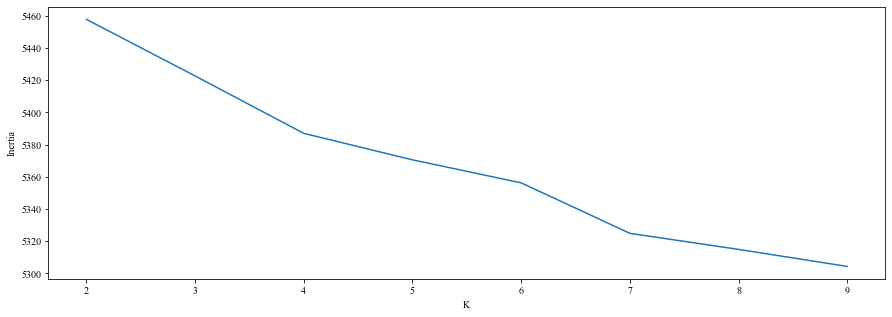

In [63]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(np.arange(2,10,1), inertias)
ax.set_xlabel('K')
ax.set_ylabel('Inertia')
plt.show()

Usually, we would choose the value of $K$ associated with the highest curvature. However, given that curve resembles a straight line and only marginal gains appear with increasing $K$, we decide to use $K=2$.

Subsequently, we will choose the most suitable $\epsilon$ value used in DBSCAN by visualising the distance between the n nearest neighbours as a function of n. $\epsilon$ is choosed where the curve express the highest curvature:

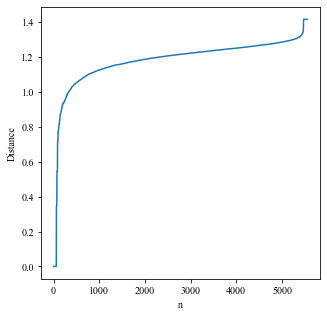

In [64]:
from sklearn.neighbors import NearestNeighbors

n_neighbors = 10
nearest_neighbors = NearestNeighbors(n_neighbors=n_neighbors)
neighbors = nearest_neighbors.fit(X)
distances, indices = neighbors.kneighbors(X)
distances = np.sort(distances[:,n_neighbors-1], axis=0)
fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("n")
plt.ylabel("Distance")
plt.show()

This approach appeared to be a bit more challenging than selecting $K$, we see that the highest curvature is with a very small epsilon value. Different epsilon values was also tried and the best appeared to be $\epsilon=0.1$, this is also true for all the other experiments. 

#### Performing Clustering

Conducting the clustering using the hyperparameters identified above:

In [80]:
from sklearn.cluster import DBSCAN
kmeans_assign, centroids, _ = kmeans(X, k=2, random_state=2, tot=1e-4, verbose=False)
clustering_db = DBSCAN(eps=0.1, min_samples=2).fit(X)
dbscan_assign = clustering_db.labels_

Evaluating performance:

In [81]:
labels = df.label.replace({'ham':0, 'spam':1}).values
performance_metrics(X.toarray(), kmeans_assign, labels)
performance_metrics(X.toarray(), dbscan_assign, labels)

ARI: 0.364
NMI: 0.185
DBI: 6.400


ARI: 0.240
NMI: 0.127
DBI: 1.000




(0.23998548425618804, 0.12651756096627617, 1.0001410410195866)

### Latent Semantic Analysis


Computing the truncated SVD that approximately explains 50% of the variance.

In [102]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=300)
X_svd = svd.fit_transform(X)
var_explained = svd.explained_variance_ratio_.sum()
print(var_explained)

0.502669305196625


#### Hyperparameter tuning

Selecting $K$:

In [103]:
inertias = np.zeros(8)
best_inertia = 1e5
for i, k in enumerate(np.arange(2,10,1)):
    assign, centroids, inertia = kmeans(X_svd, k=k, random_state=42, tot=1e-4, verbose=False)
    inertias[i] = inertia
    if inertia < best_inertia:
        best_assign = assign
        best_centroids = centroids
        best_inertia = inertia

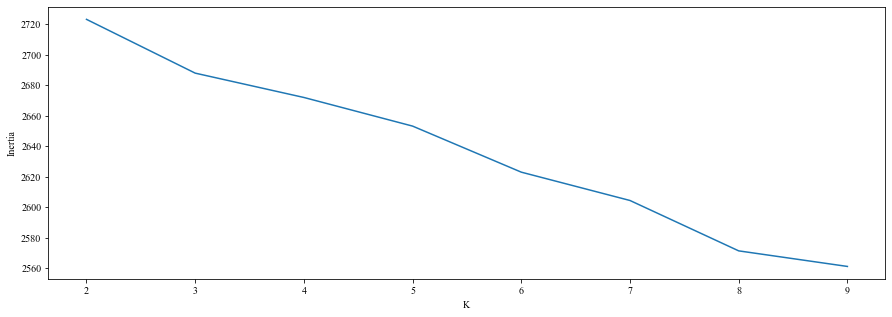

In [104]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(np.arange(2,10,1), inertias)
ax.set_xlabel('K')
ax.set_ylabel('Inertia')
plt.show()

Selecting $\epsilon$:

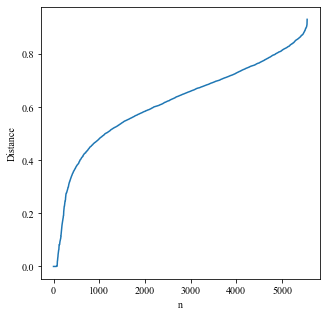

In [105]:
from sklearn.neighbors import NearestNeighbors
n_neighbors = 10
nearest_neighbors = NearestNeighbors(n_neighbors=n_neighbors)
neighbors = nearest_neighbors.fit(X_svd)
distances, indices = neighbors.kneighbors(X_svd)
distances = np.sort(distances[:,n_neighbors-1], axis=0)
fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("n")
plt.ylabel("Distance")
plt.show()

#### Performing Clustering
Conducting clustering:

In [106]:
clustering_db = DBSCAN(eps=0.1, min_samples=2).fit(X_svd)
dbscan_assign = clustering_db.labels_
kmeans_assign, centroids, _ = kmeans(X_svd, k=2, random_state=42, tot=1e-4, n_init=10, verbose=False)

Evaluating performance

In [107]:
labels = df.label.replace({'ham':0, 'spam':1}).values
performance_metrics(X_svd, kmeans_assign, labels)
performance_metrics(X_svd, dbscan_assign, labels)

ARI: 0.360
NMI: 0.182
DBI: 4.681


ARI: 0.240
NMI: 0.131
DBI: 1.039




(0.23959568618909374, 0.13109211453577072, 1.0391529780630693)

### Cosine Distance

In [88]:
from sklearn.metrics import pairwise_distances
dist = pairwise_distances(X, metric='cosine')

#### Hyperparameter tuning
Selecting $K$:

In [89]:
inertias = np.zeros(8)
best_inertia = 1e5
for i, k in tqdm(enumerate(np.arange(2,10,1))):
    assign, centroids, inertia = kmeans(dist, k=k, random_state=2, tot=1e-4, verbose=False)
    inertias[i] = inertia
    if inertia < best_inertia:
        best_assign = assign
        best_centroids = centroids
        best_inertia = inertia

0it [00:00, ?it/s]

KeyboardInterrupt: 

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(np.arange(2,10,1), inertias)
ax.set_xlabel('K')
ax.set_ylabel('Inertia')
plt.show()

Selecting $\epsilon$:

In [ ]:
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=100)
neighbors = nearest_neighbors.fit(dist)
distances, indices = neighbors.kneighbors(dist)
distances = np.sort(distances[:,10], axis=0)
fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("n")
plt.ylabel("Distance")
#plt.xlim([0, 500])
plt.savefig("Distance_curve.png", dpi=300)

#### Performing Clustering
Conducting clustering:

In [90]:
kmeans_assign, centroids_kmeans, _ = kmeans(dist, k=2, random_state=2, tot=0.0001, n_init=10, verbose=False)
dist = pairwise_distances(X, metric='cosine')
clustering_db = DBSCAN(eps=0.1, min_samples=2, metric='precomputed').fit(dist)
dbscan_assign = clustering_db.labels_

Evaluating performance:

In [91]:
labels = df.label.replace({'ham':0, 'spam':1}).values
performance_metrics(dist, kmeans_assign, labels)
performance_metrics(dist, dbscan_assign, labels)

ARI: 0.340
NMI: 0.165
DBI: 2.603


ARI: 0.303
NMI: 0.153
DBI: 0.919




(0.3033803683044152, 0.15260235807520328, 0.9186798964352724)

### Spectral Clustering 

In [108]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(X)

In [109]:
# Define affinity matrix
A = similarity

#Setting diagonal elements to 0.0 and removing documents with no similarity with other documents
np.fill_diagonal(A, 0.0)
row_sum = A.sum(0)
removed_idx = np.where(A.sum(0)==0)[0]
A_reduced = A[row_sum != 0, :]
A_reduced = A_reduced[:, row_sum!=0]

assert np.where(A_reduced.sum(0)==0)[0].size == 0
assert np.where(A_reduced.sum(1)==0)[0].size == 0

# Define D as a diagonal matrix where element (i,i) corresponds to the sum of ith row in A
D = np.diag(A_reduced.sum(axis=0))
D_pow = np.diag(np.power(np.diagonal(D), -0.5))
# Define L=D^{-1/2}AD^{-1/2}
L = D_pow@A_reduced@D_pow

# Find the k largest eigenvectors of L
eigenvals, eigenvectors = np.linalg.eigh(L)

k = 10
k_largest = np.argpartition(eigenvals, -k)[-k:]

#Create matrix X_spec = [x1,...,xk]
X_spec = eigenvectors[:, k_largest]

# Define Y as X row normalized
Y = X_spec/np.linalg.norm(X_spec, axis=0)

row_sums = np.power(X_spec, 2).sum(axis=1)
#row_sums = X_spec.sum(axis=1)
Y = (X_spec / np.power(row_sums[:, np.newaxis], 0.5))
#Y = X_spec / row_sums[:, np.newaxis]
Y = np.nan_to_num(Y)

#### Hyperparameter tuning
Choosing $K$:

In [110]:
inertias = np.zeros(8)
best_inertia = 1e5
for i, k in enumerate(np.arange(2,10,1)):
    assign, centroids, inertia = kmeans(Y, k=k, random_state=2, tot=1e-4)
    inertias[i] = inertia
    if inertia < best_inertia:
        best_assign = assign
        best_centroids = centroids
        best_inertia = inertia

Kmeans run no. 1
Number of centroids defined: 2
Iteration number: 1 - diff 100000.0
Iteration number: 2 - diff 0.7869111397406908
Iteration number: 3 - diff 0.18106200706125156
Iteration number: 4 - diff 0.06164223273836618
Iteration number: 5 - diff 0.02027610996454548
Iteration number: 6 - diff 0.008002414784623197
Iteration number: 7 - diff 0.0012525935676340996
Current best inertia: 1202.5337761623625
Kmeans run no. 2
Number of centroids defined: 2
Iteration number: 1 - diff 100000.0
Iteration number: 2 - diff 0.3187723867658143
Iteration number: 3 - diff 0.04958128864033119
Iteration number: 4 - diff 0.008211193085800697
Iteration number: 5 - diff 0.005288733608296029
Iteration number: 6 - diff 0.0035609835064965966
Kmeans run no. 3
Number of centroids defined: 2
Iteration number: 1 - diff 100000.0
Iteration number: 2 - diff 0.6833271684056318
Iteration number: 3 - diff 0.14347234845177595
Iteration number: 4 - diff 0.07289676045014507
Iteration number: 5 - diff 0.0501264703177055

Number of centroids defined: 2
Number of centroids defined: 3
Number of centroids defined: 4
Iteration number: 1 - diff 100000.0
Iteration number: 2 - diff 0.7522717322140914
Iteration number: 3 - diff 0.24396353451875022
Iteration number: 4 - diff 0.15863874967425529
Iteration number: 5 - diff 0.09194680388365886
Iteration number: 6 - diff 0.05503571430289682
Iteration number: 7 - diff 0.030118707978483327
Iteration number: 8 - diff 0.014786027314745456
Iteration number: 9 - diff 0.00802202303054515
Iteration number: 10 - diff 0.0036848575546595897
Iteration number: 11 - diff 0.0009323957407605869
Iteration number: 12 - diff 0.0005061921538156189
Iteration number: 13 - diff 0.0010780145748215562
Iteration number: 14 - diff 0.00062409148801135
Current best inertia: 589.4426282248893
Kmeans run no. 2
Number of centroids defined: 2
Number of centroids defined: 3
Number of centroids defined: 4
Iteration number: 1 - diff 100000.0
Iteration number: 2 - diff 0.8602348163094538
Iteration numb

Iteration number: 1 - diff 100000.0
Iteration number: 2 - diff 1.251405328527142
Iteration number: 3 - diff 0.18322972276031116
Iteration number: 4 - diff 0.12714443740334802
Iteration number: 5 - diff 0.087772561626098
Iteration number: 6 - diff 0.05665991878547594
Iteration number: 7 - diff 0.03631913346141622
Iteration number: 8 - diff 0.023953451048419158
Iteration number: 9 - diff 0.010014496998903642
Iteration number: 10 - diff 0.006064753511013754
Iteration number: 11 - diff 0.0021352695582016693
Iteration number: 12 - diff 0.0004813191799872695
Kmeans run no. 10
Number of centroids defined: 2
Number of centroids defined: 3
Number of centroids defined: 4
Iteration number: 1 - diff 100000.0
Iteration number: 2 - diff 0.9181752745679581
Iteration number: 3 - diff 0.30498285798117497
Iteration number: 4 - diff 0.10933923196942993
Iteration number: 5 - diff 0.06088654795751466
Iteration number: 6 - diff 0.04861238313266095
Iteration number: 7 - diff 0.05060359547667337
Iteration num

Iteration number: 6 - diff 0.10573063787496761
Iteration number: 7 - diff 0.09031609789660106
Iteration number: 8 - diff 0.07117281285049519
Iteration number: 9 - diff 0.058177715804318936
Iteration number: 10 - diff 0.058792161513852456
Iteration number: 11 - diff 0.06625757958194137
Iteration number: 12 - diff 0.05689664556160943
Iteration number: 13 - diff 0.058978711606761255
Iteration number: 14 - diff 0.0485891381771168
Iteration number: 15 - diff 0.05880729631112562
Iteration number: 16 - diff 0.05426432982401075
Iteration number: 17 - diff 0.055113396416010776
Iteration number: 18 - diff 0.05990433236577779
Iteration number: 19 - diff 0.050962656109681086
Iteration number: 20 - diff 0.0615743656991923
Iteration number: 21 - diff 0.05859964949488721
Iteration number: 22 - diff 0.05867020006868173
Iteration number: 23 - diff 0.041427840787522284
Iteration number: 24 - diff 0.03060692949700549
Iteration number: 25 - diff 0.03492751531116514
Iteration number: 26 - diff 0.0330718365

Iteration number: 23 - diff 0.00036897803788127446
Current best inertia: 371.75898558506
Kmeans run no. 3
Number of centroids defined: 2
Number of centroids defined: 3
Number of centroids defined: 4
Number of centroids defined: 5
Number of centroids defined: 6
Iteration number: 1 - diff 100000.0
Iteration number: 2 - diff 1.495594944733445
Iteration number: 3 - diff 0.5483492234474275
Iteration number: 4 - diff 0.32427835699688623
Iteration number: 5 - diff 0.15514229161189808
Iteration number: 6 - diff 0.07532407204392969
Iteration number: 7 - diff 0.049048732142057246
Iteration number: 8 - diff 0.0462197058879977
Iteration number: 9 - diff 0.040415064597865515
Iteration number: 10 - diff 0.054399376867158504
Iteration number: 11 - diff 0.06078271551257522
Iteration number: 12 - diff 0.05029524577032273
Iteration number: 13 - diff 0.04329809934730322
Iteration number: 14 - diff 0.05428725817310797
Iteration number: 15 - diff 0.04596709059206535
Iteration number: 16 - diff 0.0358945817

Number of centroids defined: 2
Number of centroids defined: 3
Number of centroids defined: 4
Number of centroids defined: 5
Number of centroids defined: 6
Iteration number: 1 - diff 100000.0
Iteration number: 2 - diff 1.3863515366271342
Iteration number: 3 - diff 0.6019316879783362
Iteration number: 4 - diff 0.35015197737618825
Iteration number: 5 - diff 0.14749865228648157
Iteration number: 6 - diff 0.09245550880154163
Iteration number: 7 - diff 0.06365649480786653
Iteration number: 8 - diff 0.044603197924687234
Iteration number: 9 - diff 0.04142230929303572
Iteration number: 10 - diff 0.04114412076595224
Iteration number: 11 - diff 0.03380582718783691
Iteration number: 12 - diff 0.03198331598398995
Iteration number: 13 - diff 0.025199090958851193
Iteration number: 14 - diff 0.021572462506776975
Iteration number: 15 - diff 0.011158322953294079
Iteration number: 16 - diff 0.009327196240734723
Iteration number: 17 - diff 0.008389808371625477
Iteration number: 18 - diff 0.006507504240780

Iteration number: 18 - diff 0.004534342687717128
Iteration number: 19 - diff 0.0014246784596616872
Iteration number: 20 - diff 0.0024902489055453076
Iteration number: 21 - diff 0.0015042740748389962
Iteration number: 22 - diff 0.0025111391951585364
Iteration number: 23 - diff 0.0015393591156828597
Iteration number: 24 - diff 0.0018011535519045097
Kmeans run no. 7
Number of centroids defined: 2
Number of centroids defined: 3
Number of centroids defined: 4
Number of centroids defined: 5
Number of centroids defined: 6
Number of centroids defined: 7
Iteration number: 1 - diff 100000.0
Iteration number: 2 - diff 0.8570733475928635
Iteration number: 3 - diff 0.35771550513790445
Iteration number: 4 - diff 0.20410822611625234
Iteration number: 5 - diff 0.16544184583835841
Iteration number: 6 - diff 0.1361930949978721
Iteration number: 7 - diff 0.11715612682266885
Iteration number: 8 - diff 0.09521829523061039
Iteration number: 9 - diff 0.07786802719545326
Iteration number: 10 - diff 0.06186224

Iteration number: 16 - diff 0.004029567421642307
Iteration number: 17 - diff 0.005726344775050494
Iteration number: 18 - diff 0.007301139136699771
Iteration number: 19 - diff 0.0069080187855075454
Iteration number: 20 - diff 0.006660092630328744
Iteration number: 21 - diff 0.008326215317540518
Iteration number: 22 - diff 0.005799460751059647
Iteration number: 23 - diff 0.0014256256636807452
Iteration number: 24 - diff 0.002261227898408549
Iteration number: 25 - diff 0.0022594065518641176
Iteration number: 26 - diff 0.0032728458522260804
Iteration number: 27 - diff 0.0049027586575940574
Iteration number: 28 - diff 0.009094446387052275
Iteration number: 29 - diff 0.012519722302467059
Iteration number: 30 - diff 0.01072937114312826
Iteration number: 31 - diff 0.010555510085945498
Iteration number: 32 - diff 0.01751800267010003
Iteration number: 33 - diff 0.01140562346735513
Iteration number: 34 - diff 0.00985658840972018
Iteration number: 35 - diff 0.003769315049068885
Iteration number: 3

Iteration number: 7 - diff 0.11776577671729078
Iteration number: 8 - diff 0.10682083023526406
Iteration number: 9 - diff 0.07403307140493531
Iteration number: 10 - diff 0.06401944720214246
Iteration number: 11 - diff 0.047801420872583565
Iteration number: 12 - diff 0.0350749019300048
Iteration number: 13 - diff 0.023460358135198728
Iteration number: 14 - diff 0.02179541024139186
Iteration number: 15 - diff 0.01501578482051205
Iteration number: 16 - diff 0.01726180296574672
Iteration number: 17 - diff 0.019433365510295116
Iteration number: 18 - diff 0.02339596842738686
Iteration number: 19 - diff 0.01916491383386693
Iteration number: 20 - diff 0.01684276096784619
Iteration number: 21 - diff 0.011582000113499313
Iteration number: 22 - diff 0.006089173141685866
Iteration number: 23 - diff 0.002307209540624384
Iteration number: 24 - diff 0.0014461690172702193
Iteration number: 25 - diff 0.001146313293770878
Iteration number: 26 - diff 0.0030614921361287652
Iteration number: 27 - diff 0.001

Number of centroids defined: 5
Number of centroids defined: 6
Number of centroids defined: 7
Number of centroids defined: 8
Number of centroids defined: 9
Iteration number: 1 - diff 100000.0
Iteration number: 2 - diff 1.7008049968947812
Iteration number: 3 - diff 0.6130722925215477
Iteration number: 4 - diff 0.2782150780473714
Iteration number: 5 - diff 0.17312366883214642
Iteration number: 6 - diff 0.0913140328329855
Iteration number: 7 - diff 0.09095310692236908
Iteration number: 8 - diff 0.04002689344799566
Iteration number: 9 - diff 0.04083528043230012
Iteration number: 10 - diff 0.024881450379990247
Iteration number: 11 - diff 0.022484565171697744
Iteration number: 12 - diff 0.022841236262343412
Iteration number: 13 - diff 0.02131570360199913
Iteration number: 14 - diff 0.01036461439793593
Iteration number: 15 - diff 0.008111131925319592
Iteration number: 16 - diff 0.011458034032421738
Iteration number: 17 - diff 0.007495964697842528
Iteration number: 18 - diff 0.00956308744390632

Iteration number: 32 - diff 0.00396876018576289
Iteration number: 33 - diff 0.00553772283354355
Iteration number: 34 - diff 0.005585814522270264
Iteration number: 35 - diff 0.0019032835341685301
Iteration number: 36 - diff 0.0007964719908616909
Iteration number: 37 - diff 0.002873174636574776
Iteration number: 38 - diff 0.0021701631547955793
Kmeans run no. 7
Number of centroids defined: 2
Number of centroids defined: 3
Number of centroids defined: 4
Number of centroids defined: 5
Number of centroids defined: 6
Number of centroids defined: 7
Number of centroids defined: 8
Number of centroids defined: 9
Iteration number: 1 - diff 100000.0
Iteration number: 2 - diff 0.9753312788921015
Iteration number: 3 - diff 0.4164507711273274
Iteration number: 4 - diff 0.23712078399267808
Iteration number: 5 - diff 0.15100048791414541
Iteration number: 6 - diff 0.10862513610464838
Iteration number: 7 - diff 0.09567707101609393
Iteration number: 8 - diff 0.11152128449671635
Iteration number: 9 - diff 0

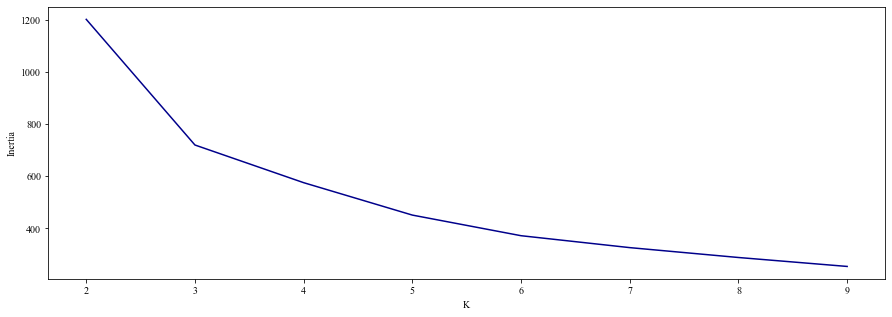

In [111]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(np.arange(2,10,1), inertias, c='darkblue')
ax.set_xlabel('K')
ax.set_ylabel('Inertia')
plt.show()

This plot might suggest one should use k=3, however, this lead to bad results. Hence, k=2 was used instead. 

#### Conducting clustering

In [112]:
kmeans_spec_assign, centroids, _ = kmeans(Y, k=2, random_state=2, tot=1e-4, verbose=False)

Evaluating performance:

In [113]:
labels = df.drop(removed_idx).label.replace({'ham':0, 'spam':1}).values
performance_metrics(Y, kmeans_spec_assign, labels)

ARI: 0.476
NMI: 0.317
DBI: 0.725




(0.47629594344261167, 0.3174677543841501, 0.7251113046758313)

## Emails
This section will conduct the exact same procedure as the above. Hence, the number of comments will be limited and for further explainations please see the section above.

In [115]:
df = pd.read_csv('../data/clean/clean_completeSpamAssassin.csv')
df['tokens'] = df['tokens'].apply(literal_eval)
df.head()

text label  \
0  \nSave up to 70% on Life Insurance.\nWhy Spend...  spam   
1  1) Fight The Risk of Cancer!\nhttp://www.adcli...  spam   
2  1) Fight The Risk of Cancer!\nhttp://www.adcli...  spam   
3  ##############################################...  spam   
4  I thought you might like these:\n1) Slim Down ...  spam   

                                              tokens  \
0  [save, life, insur, spend, life, quot, save, e...   
1  [fight, risk, cancer, url, slim, guarante, los...   
2  [fight, risk, cancer, url, slim, guarante, los...   
3  [adult, club, offer, free, membership, instant...   
4  [thought, might, like, slim, guarante, lose, l...   

                                          str_tokens  binary  
0  save life insur spend life quot save ensur fam...       1  
1  fight risk cancer url slim guarante lose lb da...       1  
2  fight risk cancer url slim guarante lose lb da...       1  
3  adult club offer free membership instant acces...       1  
4  thought might like slim guarante lose lb day u...       1

In [116]:
#TDIDF
def identity_tokenizer(text):
    return text

vectorizer = TfidfVectorizer(tokenizer=identity_tokenizer,
                             lowercase=False
                            )

vecs = vectorizer.fit_transform(df['tokens'])
feature_names = vectorizer.get_feature_names_out()
dense = vecs.todense()
lst1 = dense.tolist()
TDM = pd.DataFrame(lst1, columns=feature_names).dropna()
X = vecs

### Clustering in Original Space
Choosing $K$:

In [ ]:
inertias = np.zeros(8)
best_inertia = 1e5
for i, k in tqdm(enumerate(np.arange(2,10,1))):
    assign, centroids, inertia = kmeans(X, k=k, random_state=2, tot=1e-4, verbose=False)
    inertias[i] = inertia
    if inertia < best_inertia:
        best_assign = assign
        best_centroids = centroids
        best_inertia = inertia

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(np.arange(2,10,1), inertias)
ax.set_xlabel('K')
ax.set_ylabel('Inertia')
plt.show()

Choosing $\epsilon$:

In [ ]:
from sklearn.neighbors import NearestNeighbors

n_neighbors = 10
nearest_neighbors = NearestNeighbors(n_neighbors=n_neighbors)
neighbors = nearest_neighbors.fit(X)
distances, indices = neighbors.kneighbors(X)
distances = np.sort(distances[:,n_neighbors-1], axis=0)
fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("n")
plt.ylabel("Distance")
plt.show()

#### Performing Clustering
Conducting clustering

In [117]:
kmeans_assign, centroids, _ = kmeans(X, k=2, random_state=2, tot=1e-4, verbose=False)
clustering_db = DBSCAN(eps=0.1, min_samples=2).fit(X)
dbscan_assign = clustering_db.labels_

KeyboardInterrupt: 

Evaluating performance:

In [ ]:
labels = df.label.replace({'ham':0, 'spam':1}).values
performance_metrics(X.toarray(), kmeans_assign, labels)
performance_metrics(X.toarray(), dbscan_assign, labels)

### Latent Semantic Analysis

In [128]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=470)
X_svd = svd.fit_transform(X)
var_explained = svd.explained_variance_ratio_.sum()
print(var_explained)

0.5080527525267886


#### Hyperparameter tuning
Choosing $k$:

In [129]:
inertias = np.zeros(8)
best_inertia = 1e5
for i, k in enumerate(np.arange(2,10,1)):
    assign, centroids, inertia = kmeans(X_svd, k=k, random_state=2, tot=1e-4)
    inertias[i] = inertia
    if inertia < best_inertia:
        best_assign = assign
        best_centroids = centroids
        best_inertia = inertia

Kmeans run no. 1
Number of centroids defined: 2
Iteration number: 1 - diff 100000.0
Iteration number: 2 - diff 1.324155589610735
Iteration number: 3 - diff 0.07765650300416908
Iteration number: 4 - diff 0.04617752451187872
Iteration number: 5 - diff 0.030829459121819267
Iteration number: 6 - diff 0.014040119042650966
Iteration number: 7 - diff 0.007995118694121294
Iteration number: 8 - diff 0.008641905762672347
Iteration number: 9 - diff 0.005570742324282943
Iteration number: 10 - diff 0.004113859019809243
Iteration number: 11 - diff 0.0048504577120438794
Iteration number: 12 - diff 0.002553034629292408
Iteration number: 13 - diff 0.002668264275436165
Iteration number: 14 - diff 0.0023746584752868975
Iteration number: 15 - diff 0.002986818448275165
Iteration number: 16 - diff 0.00358162647386531
Iteration number: 17 - diff 0.0028881616654764693
Iteration number: 18 - diff 0.0029904053103507445
Iteration number: 19 - diff 0.0023114170382801907
Iteration number: 20 - diff 0.0026474770133

Iteration number: 13 - diff 0.05729646175950217
Iteration number: 14 - diff 0.06071365678419355
Iteration number: 15 - diff 0.03554798321945135
Iteration number: 16 - diff 0.033041822395064396
Iteration number: 17 - diff 0.026602552669581468
Iteration number: 18 - diff 0.02361568135038633
Iteration number: 19 - diff 0.02605519805419178
Iteration number: 20 - diff 0.03866256283364804
Iteration number: 21 - diff 0.07538340909284352
Iteration number: 22 - diff 0.0988334804048721
Iteration number: 23 - diff 0.12035720409406567
Iteration number: 24 - diff 0.06574151535956951
Iteration number: 25 - diff 0.06297232453773721
Iteration number: 26 - diff 0.019272163000618514
Iteration number: 27 - diff 0.02181574516696723
Iteration number: 28 - diff 0.015638062115524935
Iteration number: 29 - diff 0.006766221782184572
Iteration number: 30 - diff 0.004753051408308432
Iteration number: 31 - diff 0.0026810654299727213
Current best inertia: 2591.8296217795078
Kmeans run no. 2
Number of centroids def

Iteration number: 9 - diff 0.10434752758718853
Iteration number: 10 - diff 0.07765371103559218
Iteration number: 11 - diff 0.10004775625332228
Iteration number: 12 - diff 0.14417040462821934
Iteration number: 13 - diff 0.09899606171478724
Iteration number: 14 - diff 0.08325984244562401
Iteration number: 15 - diff 0.03336103042416466
Iteration number: 16 - diff 0.026527502896751407
Iteration number: 17 - diff 0.01650847353672138
Iteration number: 18 - diff 0.007315645142432578
Iteration number: 19 - diff 0.0030018507530782126
Kmeans run no. 1
Number of centroids defined: 2
Number of centroids defined: 3
Number of centroids defined: 4
Iteration number: 1 - diff 100000.0
Iteration number: 2 - diff 2.5546253898605156
Iteration number: 3 - diff 0.26422556556260507
Iteration number: 4 - diff 0.2043858226523897
Iteration number: 5 - diff 0.10781006291399281
Iteration number: 6 - diff 0.07870232540905445
Iteration number: 7 - diff 0.05137080957284845
Iteration number: 8 - diff 0.05021848981291

Iteration number: 21 - diff 0.001963135915599573
Current best inertia: 2557.538152970283
Kmeans run no. 10
Number of centroids defined: 2
Number of centroids defined: 3
Number of centroids defined: 4
Iteration number: 1 - diff 100000.0
Iteration number: 2 - diff 2.179847860057289
Iteration number: 3 - diff 0.372805555700051
Iteration number: 4 - diff 0.3157826762912297
Iteration number: 5 - diff 0.2795548576655862
Iteration number: 6 - diff 0.1340497021597936
Iteration number: 7 - diff 0.08566420193864208
Iteration number: 8 - diff 0.03646137934994311
Iteration number: 9 - diff 0.021581068218270775
Iteration number: 10 - diff 0.025645523120058786
Iteration number: 11 - diff 0.004964298986407045
Iteration number: 12 - diff 0.0032470616579181916
Iteration number: 13 - diff 0.0016653520249213698
Kmeans run no. 1
Number of centroids defined: 2
Number of centroids defined: 3
Number of centroids defined: 4
Number of centroids defined: 5
Iteration number: 1 - diff 100000.0
Iteration number: 2

Iteration number: 10 - diff 0.005121303652855965
Iteration number: 11 - diff 0.001993774240234335
Kmeans run no. 8
Number of centroids defined: 2
Number of centroids defined: 3
Number of centroids defined: 4
Number of centroids defined: 5
Iteration number: 1 - diff 100000.0
Iteration number: 2 - diff 2.1801545399401014
Iteration number: 3 - diff 0.1282515689502648
Iteration number: 4 - diff 0.06160372792656058
Iteration number: 5 - diff 0.023906475971049612
Iteration number: 6 - diff 0.012936150938264104
Iteration number: 7 - diff 0.007397672930915533
Iteration number: 8 - diff 0.005049757483641415
Iteration number: 9 - diff 0.0030265689455161635
Iteration number: 10 - diff 0.0030006280092479917
Iteration number: 11 - diff 0.0012495707547537946
Kmeans run no. 9
Number of centroids defined: 2
Number of centroids defined: 3
Number of centroids defined: 4
Number of centroids defined: 5
Iteration number: 1 - diff 100000.0
Iteration number: 2 - diff 2.348464237254807
Iteration number: 3 - d

Iteration number: 5 - diff 0.22004258763583923
Iteration number: 6 - diff 0.20645322659482496
Iteration number: 7 - diff 0.20781971787238165
Iteration number: 8 - diff 0.19165092666332487
Iteration number: 9 - diff 0.11887956902533396
Iteration number: 10 - diff 0.07218258382041562
Iteration number: 11 - diff 0.11884864146578303
Iteration number: 12 - diff 0.10758043341363245
Iteration number: 13 - diff 0.07822930425309332
Iteration number: 14 - diff 0.06437352200037384
Iteration number: 15 - diff 0.06970873900400962
Iteration number: 16 - diff 0.047134558276479735
Iteration number: 17 - diff 0.039601724927159014
Iteration number: 18 - diff 0.018461973154106758
Iteration number: 19 - diff 0.01758701251821312
Iteration number: 20 - diff 0.011765699418964805
Iteration number: 21 - diff 0.013955134313014296
Iteration number: 22 - diff 0.007827697681455935
Iteration number: 23 - diff 0.0056949154411836955
Iteration number: 24 - diff 0.007957384244349391
Iteration number: 25 - diff 0.002617

Iteration number: 10 - diff 0.03402861306763088
Iteration number: 11 - diff 0.02028491476586297
Iteration number: 12 - diff 0.011767799628980035
Iteration number: 13 - diff 0.010838806676403865
Iteration number: 14 - diff 0.016354530542832393
Iteration number: 15 - diff 0.020999025099403858
Iteration number: 16 - diff 0.02162778247151534
Iteration number: 17 - diff 0.01846140231554831
Iteration number: 18 - diff 0.02082242115490964
Iteration number: 19 - diff 0.028645258768893393
Iteration number: 20 - diff 0.051634716275559864
Iteration number: 21 - diff 0.03650380675098498
Iteration number: 22 - diff 0.035071217719866196
Iteration number: 23 - diff 0.020151993704475332
Iteration number: 24 - diff 0.015321398075955665
Iteration number: 25 - diff 0.01936120864557743
Iteration number: 26 - diff 0.012692409941185923
Iteration number: 27 - diff 0.009729171721109976
Iteration number: 28 - diff 0.019337705397558073
Iteration number: 29 - diff 0.012726683841992954
Iteration number: 30 - diff

Iteration number: 11 - diff 0.049765208904811224
Iteration number: 12 - diff 0.01581970805449334
Iteration number: 13 - diff 0.005897705542806813
Iteration number: 14 - diff 0.004868771955722588
Iteration number: 15 - diff 0.0027827583588684664
Kmeans run no. 9
Number of centroids defined: 2
Number of centroids defined: 3
Number of centroids defined: 4
Number of centroids defined: 5
Number of centroids defined: 6
Number of centroids defined: 7
Iteration number: 1 - diff 100000.0
Iteration number: 2 - diff 2.821035036338583
Iteration number: 3 - diff 0.7645899363327171
Iteration number: 4 - diff 0.6470139338106025
Iteration number: 5 - diff 0.4930523294713211
Iteration number: 6 - diff 0.3379812029304627
Iteration number: 7 - diff 0.22281224920628634
Iteration number: 8 - diff 0.17328820804794204
Iteration number: 9 - diff 0.07818598418564661
Iteration number: 10 - diff 0.06059750642623919
Iteration number: 11 - diff 0.044988850322823994
Iteration number: 12 - diff 0.021543465112849873


Iteration number: 19 - diff 0.09076249419935599
Iteration number: 20 - diff 0.023552369318581286
Iteration number: 21 - diff 0.010084345975504828
Iteration number: 22 - diff 0.0031512344472556203
Iteration number: 23 - diff 0.002493879262647295
Iteration number: 24 - diff 0.0012581263594935725
Iteration number: 25 - diff 0.0014555493083265806
Iteration number: 26 - diff 0.0014342598395082433
Iteration number: 27 - diff 0.0035787481971697654
Iteration number: 28 - diff 0.0045646144628387186
Iteration number: 29 - diff 0.0017958670713264728
Kmeans run no. 5
Number of centroids defined: 2
Number of centroids defined: 3
Number of centroids defined: 4
Number of centroids defined: 5
Number of centroids defined: 6
Number of centroids defined: 7
Number of centroids defined: 8
Iteration number: 1 - diff 100000.0
Iteration number: 2 - diff 4.186882712044745
Iteration number: 3 - diff 0.7269213193817239
Iteration number: 4 - diff 0.36439760022510415
Iteration number: 5 - diff 0.2579454437932657
I

Iteration number: 11 - diff 0.0212471033760269
Iteration number: 12 - diff 0.012021507877237384
Iteration number: 13 - diff 0.013785260151691356
Iteration number: 14 - diff 0.007107688643149521
Iteration number: 15 - diff 0.007837242556706413
Iteration number: 16 - diff 0.013780544229988274
Iteration number: 17 - diff 0.01336367490658577
Iteration number: 18 - diff 0.014351829825885383
Iteration number: 19 - diff 0.18351776066314526
Iteration number: 20 - diff 0.7282179924079709
Iteration number: 21 - diff 0.2519562922542808
Iteration number: 22 - diff 0.07918032650743297
Iteration number: 23 - diff 0.05597671740275837
Iteration number: 24 - diff 0.059531527835679394
Iteration number: 25 - diff 0.03332004981379259
Iteration number: 26 - diff 0.009876356152079399
Iteration number: 27 - diff 0.008093019567884364
Iteration number: 28 - diff 0.038198421422311085
Iteration number: 29 - diff 0.07469467433780946
Iteration number: 30 - diff 0.1839869402060032
Iteration number: 31 - diff 0.2160

Iteration number: 12 - diff 0.03358508367173186
Iteration number: 13 - diff 0.041458272256943464
Iteration number: 14 - diff 0.030718275719278234
Iteration number: 15 - diff 0.03739237842379638
Iteration number: 16 - diff 0.07766150893212125
Iteration number: 17 - diff 0.05906344674693368
Iteration number: 18 - diff 0.01888044952670894
Iteration number: 19 - diff 0.027779244709337927
Iteration number: 20 - diff 0.027122947558351977
Iteration number: 21 - diff 0.011935632727325838
Iteration number: 22 - diff 0.018575067632440476
Iteration number: 23 - diff 0.013416953551138944
Iteration number: 24 - diff 0.005146299751028016
Iteration number: 25 - diff 0.004575688357211528
Current best inertia: 2440.0603657835863
Kmeans run no. 7
Number of centroids defined: 2
Number of centroids defined: 3
Number of centroids defined: 4
Number of centroids defined: 5
Number of centroids defined: 6
Number of centroids defined: 7
Number of centroids defined: 8
Number of centroids defined: 9
Iteration num

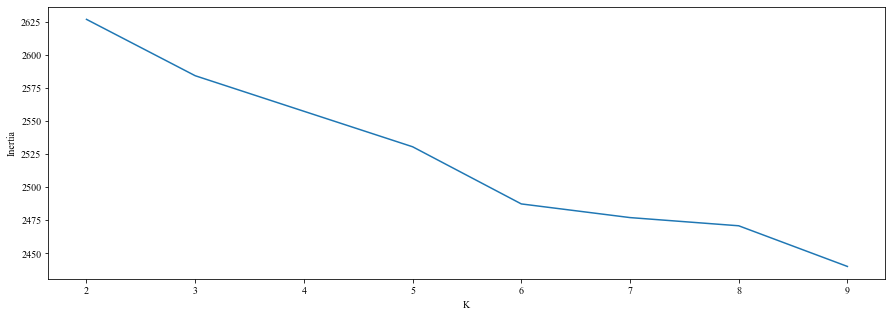

In [130]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(np.arange(2,10,1), inertias)
ax.set_xlabel('K')
ax.set_ylabel('Inertia')
plt.show()

Choosing $\epsilon$:

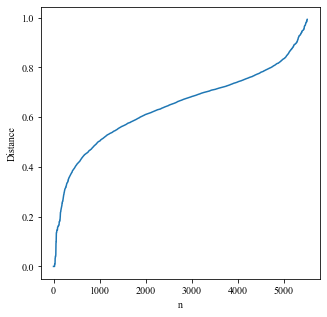

In [131]:
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=100)
neighbors = nearest_neighbors.fit(X_svd)
distances, indices = neighbors.kneighbors(X_svd)
distances = np.sort(distances[:,10], axis=0)
fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("n")
plt.ylabel("Distance")
plt.savefig("Distance_curve.png", dpi=300)

### Performing clustering
Conducting clustering:

In [136]:
kmeans_assign, centroids, _ = kmeans(X_svd, k=4, random_state=2, tot=1e-4, verbose=False)

clustering_db = DBSCAN(eps=0.1, min_samples=2).fit(X_svd)
dbscan_assign = clustering_db.labels_

Evaluating performance:

In [137]:
labels = df.label.replace({'ham':0, 'spam':1}).values
performance_metrics(X_svd, kmeans_assign, labels)
performance_metrics(X_svd, dbscan_assign, labels)

ARI: 0.495
NMI: 0.390
DBI: 4.978


ARI: 0.354
NMI: 0.184
DBI: 0.804




(0.35418320725286623, 0.18433006164456264, 0.8035203631715533)

### Cosine Distance

In [ ]:
dist = pairwise_distances(X, metric='cosine')

#### Hyperparameter tuning
Choosing $K$:

In [ ]:
inertias = np.zeros(8)
best_inertia = 1e5
for i, k in enumerate(np.arange(2,10,1)):
    assign, centroids, inertia = kmeans(dist, k=k, random_state=2, tot=1e-4)
    inertias[i] = inertia
    if inertia < best_inertia:
        best_assign = assign
        best_centroids = centroids
        best_inertia = inertia

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(np.arange(2,10,1), inertias)
ax.set_xlabel('K')
ax.set_ylabel('Inertia')
plt.show()

Choosing $\epsilon$:

In [ ]:
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=100)
neighbors = nearest_neighbors.fit(dist)
distances, indices = neighbors.kneighbors(dist)
distances = np.sort(distances[:,10], axis=0)
fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")
#plt.xlim([0, 500])
plt.savefig("Distance_curve.png", dpi=300)

#### Performing Clustering

Conducting clustering:

In [ ]:
kmeans_assign, centroids_kmeans, _ = kmeans(dist, k=4, random_state=2, tot=0.0001, n_init=10)

In [ ]:
dist = pairwise_distances(X, metric='cosine')
clustering_db = DBSCAN(eps=0.1, min_samples=2, metric='precomputed').fit(dist)
dbscan_assign = clustering_db.labels_

Evaluating performance:

In [ ]:
labels = df.label.replace({'ham':0, 'spam':1}).values
performance_metrics(dist, kmeans_assign, labels)
performance_metrics(dist, dbscan_assign, labels)

### Spectral Clustering

In [118]:
similarity = cosine_similarity(X)

In [119]:
# Define affinity matrix
A = similarity

#Setting diagonal elements to 0.0 and removing documents with no similarity with other documents
np.fill_diagonal(A, 0.0)
row_sum = A.sum(0)
removed_idx = np.where(A.sum(0)==0)[0]
A_reduced = A[row_sum != 0, :]
A_reduced = A_reduced[:, row_sum!=0]

assert np.where(A_reduced.sum(0)==0)[0].size == 0
assert np.where(A_reduced.sum(1)==0)[0].size == 0

# Define D as a diagonal matrix where element (i,i) corresponds to the sum of ith row in A
D = np.diag(A_reduced.sum(axis=0))
D_pow = np.diag(np.power(np.diagonal(D), -0.5))
# Define L=D^{-1/2}AD^{-1/2}
L = D_pow@A_reduced@D_pow

# Find the k largest eigenvectors of L
eigenvals, eigenvectors = np.linalg.eigh(L)

k = 2
k_largest = np.argpartition(eigenvals, -k)[-k:]

#Create matrix X_spec = [x1,...,xk]
X_spec = eigenvectors[:, k_largest]

# Define Y as X row normalized
Y = X_spec/np.linalg.norm(X_spec, axis=0)

row_sums = np.power(X_spec, 2).sum(axis=1)
#row_sums = X_spec.sum(axis=1)
Y = (X_spec / np.power(row_sums[:, np.newaxis], 0.5))
#Y = X_spec / row_sums[:, np.newaxis]
Y = np.nan_to_num(Y)

#### Hyperparameter tuning
Choosing $K$:

In [120]:
inertias = np.zeros(8)
best_inertia = 1e5
for i, k in enumerate(np.arange(2,10,1)):
    assign, centroids, inertia = kmeans(Y, k=k, random_state=2, tot=1e-4)
    inertias[i] = inertia
    if inertia < best_inertia:
        best_assign = assign
        best_centroids = centroids
        best_inertia = inertia

Kmeans run no. 1
Number of centroids defined: 2
Iteration number: 1 - diff 100000.0
Iteration number: 2 - diff 0.5610608701963624
Iteration number: 3 - diff 0.03221835461875801
Iteration number: 4 - diff 0.016202993488604586
Iteration number: 5 - diff 0.010798202300495758
Iteration number: 6 - diff 0.003932610461888503
Iteration number: 7 - diff 0.0022418855672761426
Iteration number: 8 - diff 0.0011191230538170076
Current best inertia: 375.6578822520457
Kmeans run no. 2
Number of centroids defined: 2
Iteration number: 1 - diff 100000.0
Iteration number: 2 - diff 0.46622861876779786
Iteration number: 3 - diff 0.14155502322792185
Iteration number: 4 - diff 0.09361738059490936
Iteration number: 5 - diff 0.051170831782472635
Iteration number: 6 - diff 0.031607870578375025
Iteration number: 7 - diff 0.016202993488604586
Iteration number: 8 - diff 0.010798202300495758
Iteration number: 9 - diff 0.003932610461888503
Iteration number: 10 - diff 0.0022418855672761426
Iteration number: 11 - dif

Iteration number: 9 - diff 0.026042875118603998
Iteration number: 10 - diff 0.02196085371039539
Iteration number: 11 - diff 0.00999832202034656
Iteration number: 12 - diff 0.006621945338667576
Iteration number: 13 - diff 0.001623091511268797
Iteration number: 14 - diff 0.000650527543418278
Iteration number: 15 - diff 0.003273715546143125
Iteration number: 16 - diff 0.004320997139559801
Iteration number: 17 - diff 0.0019888498296712427
Kmeans run no. 6
Number of centroids defined: 2
Number of centroids defined: 3
Iteration number: 1 - diff 100000.0
Iteration number: 2 - diff 0.2641910314867286
Iteration number: 3 - diff 0.08697302538433868
Iteration number: 4 - diff 0.040373517658184324
Iteration number: 5 - diff 0.02749666195960083
Iteration number: 6 - diff 0.010452417675248404
Iteration number: 7 - diff 0.005179786287525377
Iteration number: 8 - diff 0.004011600682604438
Iteration number: 9 - diff 0.0003359106433082174
Kmeans run no. 7
Number of centroids defined: 2
Number of centroi

Iteration number: 2 - diff 0.23877624361942726
Iteration number: 3 - diff 0.07257645358183379
Iteration number: 4 - diff 0.07392987165680158
Iteration number: 5 - diff 0.07615706415549794
Iteration number: 6 - diff 0.09601721116026571
Iteration number: 7 - diff 0.07974269955418277
Iteration number: 8 - diff 0.07090222923439164
Iteration number: 9 - diff 0.06836822670645074
Iteration number: 10 - diff 0.06443036666748987
Iteration number: 11 - diff 0.05220843027459866
Iteration number: 12 - diff 0.04737838657918853
Iteration number: 13 - diff 0.052362184580402676
Iteration number: 14 - diff 0.04928338673128187
Iteration number: 15 - diff 0.04191545217660878
Iteration number: 16 - diff 0.030311430570483258
Iteration number: 17 - diff 0.026285757381499693
Iteration number: 18 - diff 0.02123529053748819
Iteration number: 19 - diff 0.019559942704175035
Iteration number: 20 - diff 0.015051185192508927
Iteration number: 21 - diff 0.01052095729938905
Iteration number: 22 - diff 0.0089722396054

Iteration number: 88 - diff 0.0021480597225336786
Iteration number: 89 - diff 0.0015359335379976618
Iteration number: 90 - diff 0.00018494144905969542
Kmeans run no. 3
Number of centroids defined: 2
Number of centroids defined: 3
Number of centroids defined: 4
Number of centroids defined: 5
Iteration number: 1 - diff 100000.0
Iteration number: 2 - diff 0.30163269565288897
Iteration number: 3 - diff 0.09010887877401136
Iteration number: 4 - diff 0.05201342178637927
Iteration number: 5 - diff 0.02471039124434347
Iteration number: 6 - diff 0.01717398956441021
Iteration number: 7 - diff 0.023423919831948553
Iteration number: 8 - diff 0.018343234159613715
Iteration number: 9 - diff 0.017538042589710163
Iteration number: 10 - diff 0.01317764429198027
Iteration number: 11 - diff 0.012673570619264662
Iteration number: 12 - diff 0.009981953072228116
Iteration number: 13 - diff 0.00667953311133561
Iteration number: 14 - diff 0.005979064453730127
Iteration number: 15 - diff 0.003465781542754187
I

Iteration number: 83 - diff 0.0013510878915022197
Iteration number: 84 - diff 0.0004921546345928085
Iteration number: 85 - diff 0.000492931016800502
Iteration number: 86 - diff 0.00018875338800632897
Iteration number: 87 - diff 0.0007487161571004552
Iteration number: 88 - diff 0.0009317869627547007
Iteration number: 89 - diff 0.0013558281915403243
Iteration number: 90 - diff 0.0021480597225336786
Iteration number: 91 - diff 0.0015359335379976618
Iteration number: 92 - diff 0.00018494144905969542
Kmeans run no. 6
Number of centroids defined: 2
Number of centroids defined: 3
Number of centroids defined: 4
Number of centroids defined: 5
Iteration number: 1 - diff 100000.0
Iteration number: 2 - diff 0.41121229042134916
Iteration number: 3 - diff 0.04129495591045343
Iteration number: 4 - diff 0.016548644591639926
Iteration number: 5 - diff 0.008149873410422434
Iteration number: 6 - diff 0.0058695623194013075
Iteration number: 7 - diff 0.003650005069025853
Iteration number: 8 - diff 0.002959

Iteration number: 24 - diff 0.002702173713399752
Iteration number: 25 - diff 0.002689970272370926
Iteration number: 26 - diff 0.0028855217102153378
Iteration number: 27 - diff 0.0016659628430748539
Iteration number: 28 - diff 0.0017398857782495553
Iteration number: 29 - diff 0.002325027943935451
Iteration number: 30 - diff 0.0038174406164772257
Iteration number: 31 - diff 0.006668761322359673
Iteration number: 32 - diff 0.007006194925419295
Iteration number: 33 - diff 0.009352809300405997
Iteration number: 34 - diff 0.0097473533307277
Iteration number: 35 - diff 0.010917180207659376
Iteration number: 36 - diff 0.017696804311795704
Iteration number: 37 - diff 0.012577848369417007
Iteration number: 38 - diff 0.016283224674802164
Iteration number: 39 - diff 0.014353974202604657
Iteration number: 40 - diff 0.010547664990383124
Iteration number: 41 - diff 0.006734400719054406
Iteration number: 42 - diff 0.004557717203877883
Iteration number: 43 - diff 0.004094044401875647
Iteration number: 

Iteration number: 33 - diff 0.0013068928143747309
Iteration number: 34 - diff 0.0009295514763213063
Iteration number: 35 - diff 0.0009599726345924319
Iteration number: 36 - diff 0.0004219817510885098
Iteration number: 37 - diff 0.0002700382478454389
Kmeans run no. 5
Number of centroids defined: 2
Number of centroids defined: 3
Number of centroids defined: 4
Number of centroids defined: 5
Number of centroids defined: 6
Iteration number: 1 - diff 100000.0
Iteration number: 2 - diff 0.3650070973645536
Iteration number: 3 - diff 0.1712273464771053
Iteration number: 4 - diff 0.12362940205436151
Iteration number: 5 - diff 0.07084681782097967
Iteration number: 6 - diff 0.0460650089929007
Iteration number: 7 - diff 0.0280729874694452
Iteration number: 8 - diff 0.02403864330223071
Iteration number: 9 - diff 0.021032040807815938
Iteration number: 10 - diff 0.017124378605353357
Iteration number: 11 - diff 0.015591904713205616
Iteration number: 12 - diff 0.009754949452448924
Iteration number: 13 -

Number of centroids defined: 5
Number of centroids defined: 6
Number of centroids defined: 7
Iteration number: 1 - diff 100000.0
Iteration number: 2 - diff 0.34333937093568684
Iteration number: 3 - diff 0.11146676997191828
Iteration number: 4 - diff 0.07424464653535404
Iteration number: 5 - diff 0.051744389089282944
Iteration number: 6 - diff 0.03399558129431602
Iteration number: 7 - diff 0.029673819644194167
Iteration number: 8 - diff 0.0273293192080198
Iteration number: 9 - diff 0.02855801287515032
Iteration number: 10 - diff 0.011738886457156998
Iteration number: 11 - diff 0.0064356267058176654
Iteration number: 12 - diff 0.010069417513906442
Iteration number: 13 - diff 0.00820896281865629
Iteration number: 14 - diff 0.003827398533288685
Iteration number: 15 - diff 0.003240864530206383
Iteration number: 16 - diff 0.0028060515882342733
Iteration number: 17 - diff 0.003249018147965784
Iteration number: 18 - diff 0.003969373093027255
Iteration number: 19 - diff 0.0037075641648968882
It

Iteration number: 14 - diff 0.010702665703245295
Iteration number: 15 - diff 0.00957687589427257
Iteration number: 16 - diff 0.004700445563914743
Iteration number: 17 - diff 0.00402287435666693
Iteration number: 18 - diff 0.003922001155414026
Iteration number: 19 - diff 0.0035200029188895677
Iteration number: 20 - diff 0.0033507276619867414
Iteration number: 21 - diff 0.0006227650589801848
Iteration number: 22 - diff 0.002454597054330493
Iteration number: 23 - diff 0.002967432647264937
Iteration number: 24 - diff 0.002390420235347027
Iteration number: 25 - diff 0.0015592204116124963
Iteration number: 26 - diff 0.0014112832948241704
Iteration number: 27 - diff 0.0016307774904331588
Iteration number: 28 - diff 0.004027172844652863
Iteration number: 29 - diff 0.00180898394427627
Iteration number: 30 - diff 0.0024821130617071183
Iteration number: 31 - diff 0.0018742707176826552
Iteration number: 32 - diff 0.0014424981083467818
Iteration number: 33 - diff 0.001850452995878403
Iteration numb

Number of centroids defined: 7
Number of centroids defined: 8
Iteration number: 1 - diff 100000.0
Iteration number: 2 - diff 0.316147451114779
Iteration number: 3 - diff 0.1285947852926302
Iteration number: 4 - diff 0.10515782911952681
Iteration number: 5 - diff 0.08048178114496592
Iteration number: 6 - diff 0.06286815527563351
Iteration number: 7 - diff 0.05369631412090646
Iteration number: 8 - diff 0.05869594156557255
Iteration number: 9 - diff 0.04697816227715584
Iteration number: 10 - diff 0.03115747279639287
Iteration number: 11 - diff 0.028589398600245956
Iteration number: 12 - diff 0.02390028465806366
Iteration number: 13 - diff 0.025011768689510706
Iteration number: 14 - diff 0.020921021878076693
Iteration number: 15 - diff 0.016523274100473658
Iteration number: 16 - diff 0.02076467858332231
Iteration number: 17 - diff 0.013514885183799457
Iteration number: 18 - diff 0.014476012099382903
Iteration number: 19 - diff 0.011442620989742202
Iteration number: 20 - diff 0.008679006533

Iteration number: 15 - diff 0.019007203749866544
Iteration number: 16 - diff 0.018861268648256192
Iteration number: 17 - diff 0.016866270291656778
Iteration number: 18 - diff 0.00851522850307158
Iteration number: 19 - diff 0.007232292899910009
Iteration number: 20 - diff 0.004232844824337133
Iteration number: 21 - diff 0.008632490538756768
Iteration number: 22 - diff 0.008124842243247216
Iteration number: 23 - diff 0.007145387846944577
Iteration number: 24 - diff 0.005205949789970743
Iteration number: 25 - diff 0.0047396990110356255
Iteration number: 26 - diff 0.003449538074564707
Iteration number: 27 - diff 0.0023849456768986164
Iteration number: 28 - diff 0.002105281147102146
Iteration number: 29 - diff 0.002243182521965043
Iteration number: 30 - diff 0.0008477728912571372
Iteration number: 31 - diff 0.0007268607604590911
Iteration number: 32 - diff 0.000728785833178287
Iteration number: 33 - diff 0.00030943794377232773
Iteration number: 34 - diff 0.00013396626362494548
Kmeans run no

Iteration number: 15 - diff 0.0029551266222780583
Iteration number: 16 - diff 0.0009835967367757329
Iteration number: 17 - diff 0.00037304350765302984
Iteration number: 18 - diff 0.0009146812789814506
Iteration number: 19 - diff 0.0007931367745516955
Iteration number: 20 - diff 0.00025066930830977086
Iteration number: 21 - diff 0.0001289133152151621
Iteration number: 22 - diff 0.00025053579526650063
Iteration number: 23 - diff 0.0001288333411271758
Iteration number: 24 - diff 0.00026727754784945066
Iteration number: 25 - diff 0.0008569935883396965
Iteration number: 26 - diff 0.00014866582694009683
Current best inertia: 22.074676930222825
Kmeans run no. 2
Number of centroids defined: 2
Number of centroids defined: 3
Number of centroids defined: 4
Number of centroids defined: 5
Number of centroids defined: 6
Number of centroids defined: 7
Number of centroids defined: 8
Number of centroids defined: 9
Iteration number: 1 - diff 100000.0
Iteration number: 2 - diff 0.40464878681866334
Iterat

Number of centroids defined: 7
Number of centroids defined: 8
Number of centroids defined: 9
Iteration number: 1 - diff 100000.0
Iteration number: 2 - diff 0.3468798992515042
Iteration number: 3 - diff 0.08792997067963355
Iteration number: 4 - diff 0.07007296282104832
Iteration number: 5 - diff 0.06557616962864422
Iteration number: 6 - diff 0.06053566988727617
Iteration number: 7 - diff 0.05775657730646772
Iteration number: 8 - diff 0.04349431629362395
Iteration number: 9 - diff 0.039813591341778566
Iteration number: 10 - diff 0.037069924557873266
Iteration number: 11 - diff 0.033434346933537355
Iteration number: 12 - diff 0.033311596715565606
Iteration number: 13 - diff 0.029413201602435848
Iteration number: 14 - diff 0.025894695287687047
Iteration number: 15 - diff 0.020066708299929653
Iteration number: 16 - diff 0.02113782128325223
Iteration number: 17 - diff 0.018211862851508595
Iteration number: 18 - diff 0.022353821582114488
Iteration number: 19 - diff 0.025364741645362475
Iterat

Iteration number: 31 - diff 0.001701562297300348
Iteration number: 32 - diff 0.0009713318638024744
Iteration number: 33 - diff 0.001192964844399934
Iteration number: 34 - diff 0.001626853595678241
Iteration number: 35 - diff 0.0012875773721573386
Iteration number: 36 - diff 0.0011315815354471374
Iteration number: 37 - diff 0.0004492522500498003
Iteration number: 38 - diff 0.0011232717030758587
Iteration number: 39 - diff 0.002259093580182335
Iteration number: 40 - diff 0.0024983875104546424
Iteration number: 41 - diff 0.002506182278115348
Iteration number: 42 - diff 0.002943563979910089
Iteration number: 43 - diff 0.0020122601613263525
Iteration number: 44 - diff 0.0019509146345614119
Iteration number: 45 - diff 0.0032388725274926176
Iteration number: 46 - diff 0.0008854639295371489
Iteration number: 47 - diff 0.0002898929513160802
Iteration number: 48 - diff 0.00039884050874851263


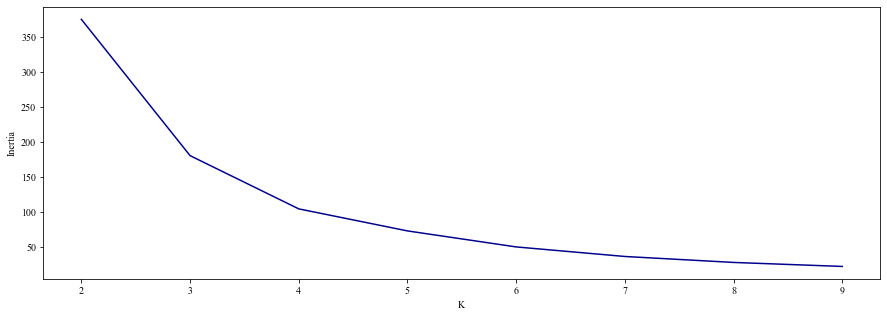

In [121]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(np.arange(2,10,1), inertias, c='darkblue')
ax.set_xlabel('K')
ax.set_ylabel('Inertia')
plt.show()

#### Performing Clustering
Conducting clustering:

In [122]:
kmeans_spec_assign, centroids, _ = kmeans(Y, k=3, random_state=2, tot=1e-4, verbose=False)

Evaluating performance:

In [123]:
labels = df.drop(removed_idx).label.replace({'ham':0, 'spam':1}).values
performance_metrics(Y, kmeans_spec_assign, labels)

ARI: 0.676
NMI: 0.494
DBI: 0.489




(0.6757368917326583, 0.4938324986231547, 0.48926163458439165)

## Visualizing Clustering Results
The following section will visualize the best obtained clustering results (Spectral clustering with K-means) wil be visualised and analysed in more depth.

### Reorganized Affinity Matrix

The following is the reorganized pairwise cosine similarity matrix both using the ground truth partition and the cluster allocations:

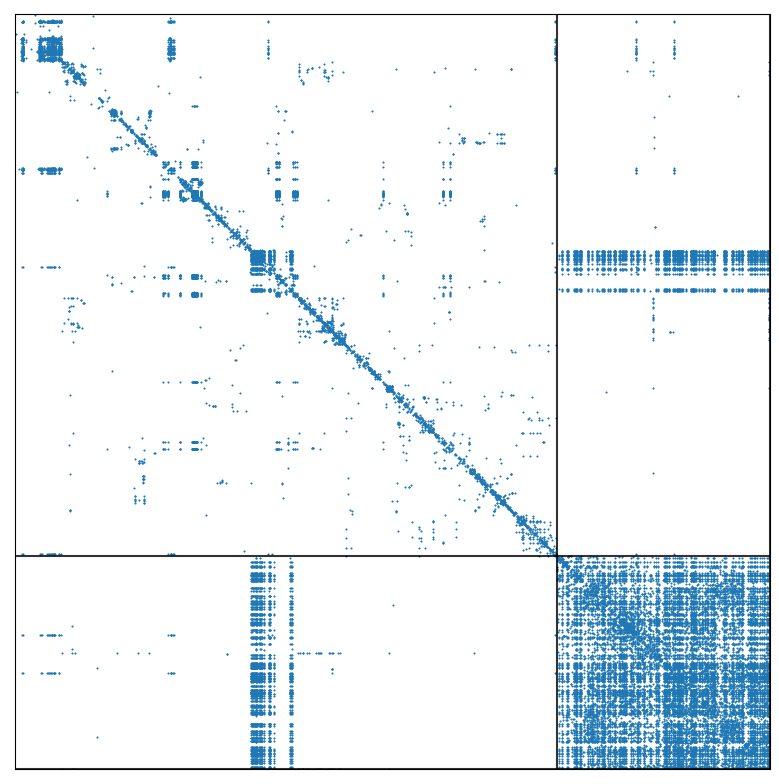

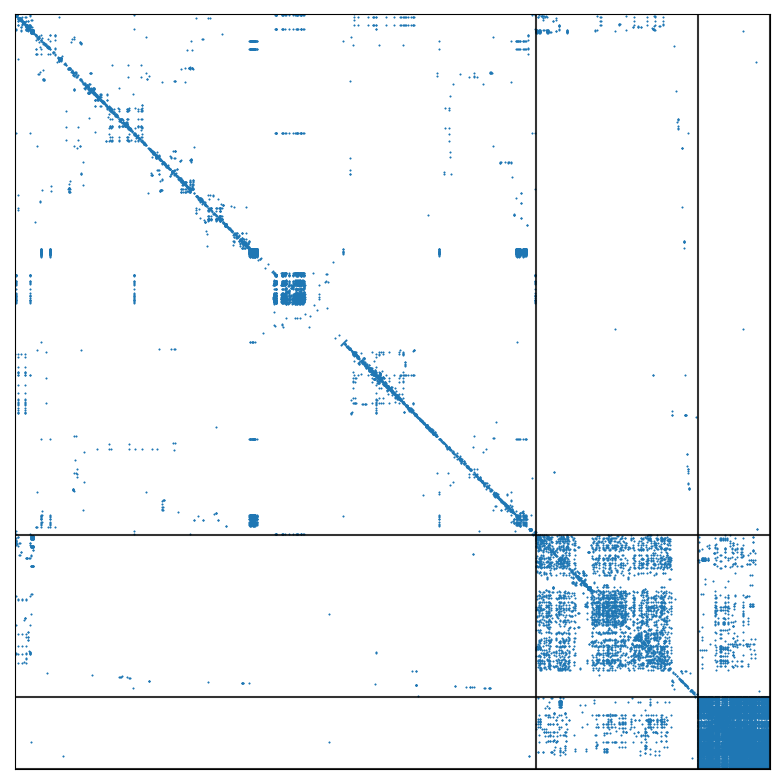

In [124]:
new_order = labels.argsort()

_, group_len = np.unique(labels, return_counts=True)


D = A_reduced[:, new_order][new_order]

fig, (ax1) = plt.subplots(figsize=(10,10), dpi=100)
ax1.spy(D, precision=0.5, markersize=0.5)
ax1.set_xticks([])
ax1.set_yticks([])

y = labels
N = A_reduced.shape[0]
counts=np.unique(y,return_counts=True)[1]
counts_j=np.unique(y,return_counts=True)[1]
cum_i=np.cumsum(counts)
cum_j=np.cumsum(counts_j)

for i in range(cum_i.shape[0]):
    x1=np.array([cum_i[i],cum_i[i]])
    y1=np.array([[0,N]])
    line = plt.Line2D(y1, x1, lw=1.5, color='k', alpha=0.8)
    ax1.add_line(line)

for i in range(cum_i.shape[0]):
    x1=np.array([cum_j[i],cum_j[i]])
    y1=np.array([[0,N]])
    line = plt.Line2D(x1, y1, lw=1.5, color='k', alpha=0.8)
    ax1.add_line(line)

fig.savefig('sim_matrix_ground_truth.png', dpi=100)

fig, (ax2) = plt.subplots(figsize=(10,10), dpi=100)

freq = np.flip(np.argsort(np.bincount(kmeans_spec_assign))[-(np.unique(kmeans_spec_assign).size):])
new_order = np.hstack((np.where(kmeans_spec_assign==freq[0])[0], 
                       np.where(kmeans_spec_assign==freq[1])[0],
                       np.where(kmeans_spec_assign==freq[2])[0]))

D = A[:, new_order][new_order]

ax2.spy(D, precision=0.5, markersize=0.5)
ax2.set_xticks([])
ax2.set_yticks([])

y = kmeans_spec_assign
N = len(y)
counts=np.unique(y,return_counts=True)[1][freq]
counts_j=np.unique(y, return_counts=True)[1][freq]
cum_i=np.cumsum(counts)
cum_j=np.cumsum(counts_j)

for i in range(cum_i.shape[0]):
    x1=np.array([cum_i[i],cum_i[i]])
    y1=np.array([[0,N]])
    line = plt.Line2D(y1, x1, lw=1.5, color='k', alpha=0.8)
    ax2.add_line(line)

for i in range(cum_j.shape[0]):
    x1=np.array([cum_j[i],cum_j[i]])
    y1=np.array([[0,N]])
    line = plt.Line2D(x1, y1, lw=1.5, color='k', alpha=0.8)
    ax2.add_line(line)
    
plt.show()

### PCA

In [125]:
from sklearn import decomposition

The following figures visualize the PCA of the Emails dataset annotated by the ground truth class and the cluster allocations:

In [126]:
X_reduced = np.delete(X.toarray(), removed_idx, axis=0)
pca = decomposition.PCA(n_components=2)
pca.fit(X_reduced)
pca_emb = pca.transform(X_reduced)

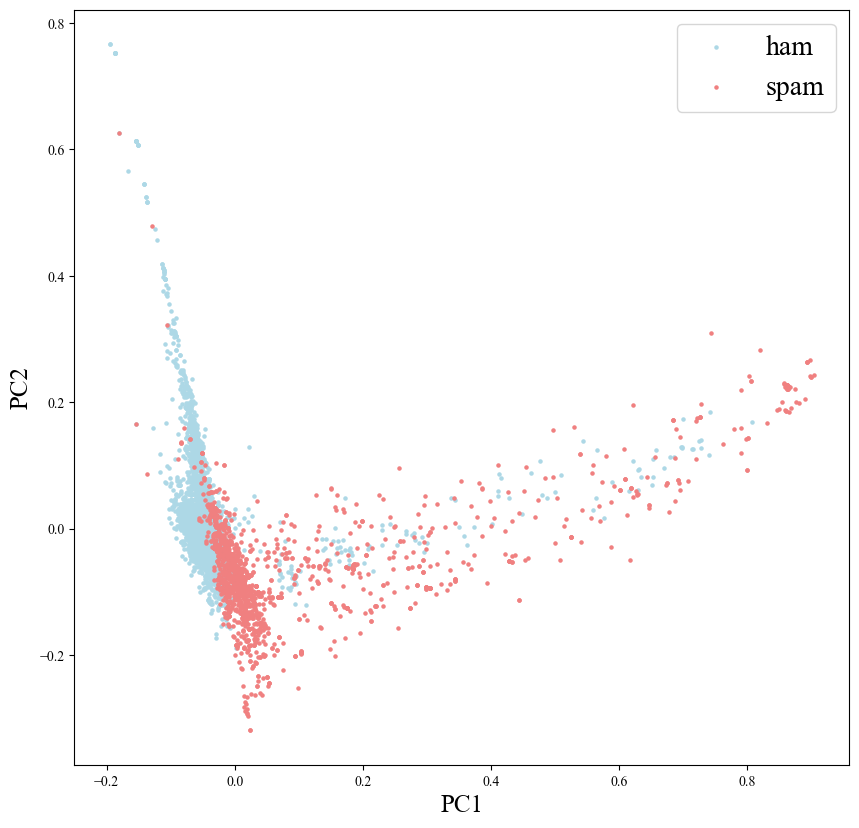

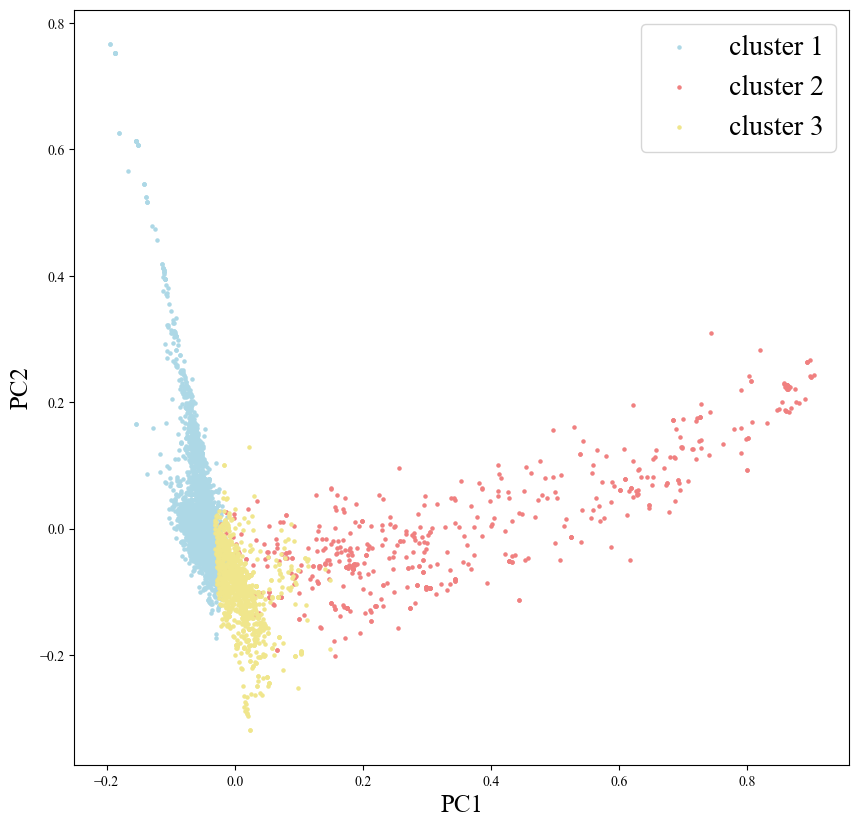

In [127]:
ham_idx = np.where(labels==0)[0]
spam_idx = np.where(labels==1)[0]


fig, ax1 = plt.subplots(figsize=(10,10), dpi=100)
clust1 = np.where(kmeans_spec_assign==0)[0]
clust2 = np.where(kmeans_spec_assign==1)[0]
clust3 = np.where(kmeans_spec_assign==2)[0]

ax1.scatter(pca_emb[:,0][ham_idx], 
            pca_emb[:,1][ham_idx],
            c='lightblue',
            s=5,
            label='ham')
ax1.scatter(pca_emb[:,0][spam_idx], 
            pca_emb[:,1][spam_idx],
            c='lightcoral',
            s=5,
            label='spam')

ax1.set_xlabel('PC1', fontsize=18)
ax1.set_ylabel('PC2', fontsize=18)
#ax1.set_title('Ground truth')

ax1.legend(prop={'size': 20})
fig.savefig('pca_embedding_ground_truth.png', dpi=100)

fig, ax2 = plt.subplots(figsize=(10,10), dpi=100)

ax2.scatter(pca_emb[:,0][clust2], 
            pca_emb[:,1][clust2],
            c='lightblue',
            s=5,
            label='cluster 1')
ax2.scatter(pca_emb[:,0][clust1], 
            pca_emb[:,1][clust1],
            c='lightcoral',
            s=5,
            label='cluster 2')
ax2.scatter(pca_emb[:,0][clust3], 
            pca_emb[:,1][clust3],
            c='khaki',
            s=5,
            label='cluster 3')

ax2.set_xlabel('PC1', fontsize=18)
ax2.set_ylabel('PC2', fontsize=18)
#ax2.set_title('Community assignment')
legend = ax2.legend(prop={'size': 20})
fig.savefig('pca_embedding_community.png', dpi=100)
plt.show()

## Missclassifications
By inspecting the visualisations of the clusters both in the PCA figures and the reordered pairwise similarity/affinity matrix, it seems as if the spectral clustering algorithmm have identified three clusters. One of which is mainly composed of ham mails, while the other two appear to be composed of spam mails. As a first step let us validate these indications:

In [138]:
clust1_dist = np.unique(labels[np.where(kmeans_spec_assign==0)[0]], return_counts=True)
clust2_dist = np.unique(labels[np.where(kmeans_spec_assign==1)[0]], return_counts=True)
clust3_dist = np.unique(labels[np.where(kmeans_spec_assign==2)[0]], return_counts=True)

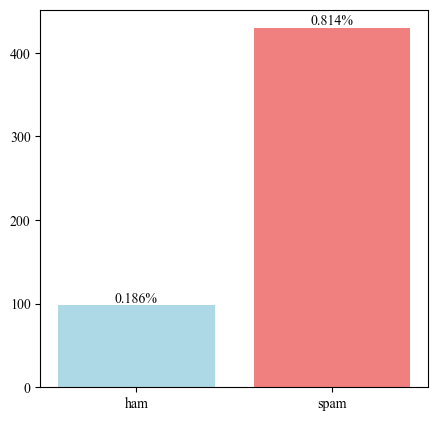

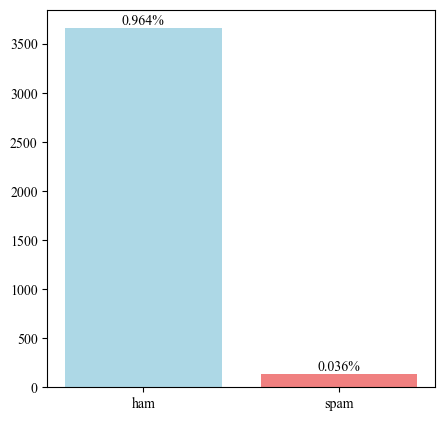

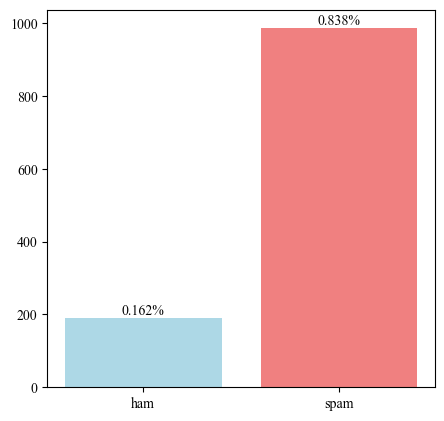

In [139]:
for dist in [clust1_dist, clust2_dist, clust3_dist]:
    fig, ax = plt.subplots(figsize=(5,5), dpi=100)
    bar = ax.bar(['ham', 'spam'], dist[1], color=['lightblue', 'lightcoral'])
    
    # Add counts above the two bar graphs
    for rect in bar:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height/(np.sum(dist[1])):.3f}%', ha='center', va='bottom')

    plt.show()

The above illustrations verify the earlier indications.

As the next step in our analysis we will take a deeper look into where the classifications go wrong, and try to deduce why the misclassification might occur. First we will look into the non identified spam mails, that have been assigned to cluster with a majority of ham mails.

In [140]:
from wordcloud import WordCloud
idx = np.where(kmeans_spec_assign==1)[0]
clust2 = labels[idx]

feature_names = vectorizer.get_feature_names_out()
TDM = pd.DataFrame(X_reduced, columns=feature_names).dropna()
miss_classified = TDM.iloc[idx[np.where(clust2==1)[0]], :]

clust_cloud = WordCloud(background_color="white", width=1600, height=800).generate_from_frequencies(miss_classified.T.sum(axis=1))

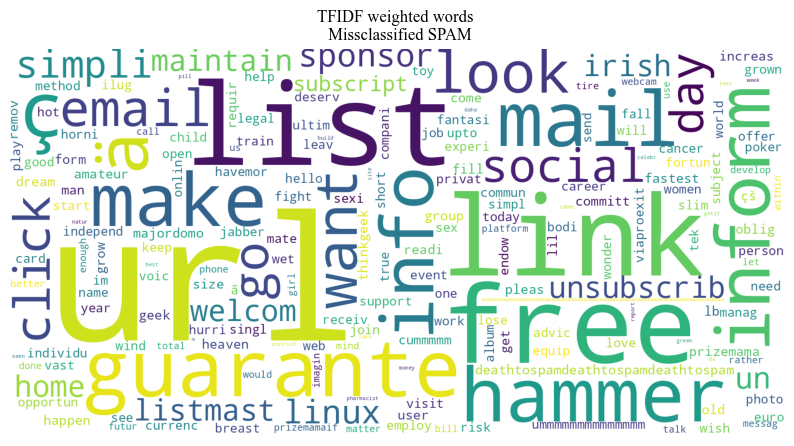

In [141]:
fig, ax = plt.subplots(figsize=(10,10), dpi=100)
ax.imshow(clust_cloud)
ax.axis("off")
ax.set_title('TFIDF weighted words \n Missclassified SPAM')
#plt.savefig('wordcloud_miss_spam.png',dpi=100)
plt.show()

It definitely stands out as SPAM. We will try to go through a few examples:

In [142]:
miss_classified_text = df.drop(removed_idx).iloc[idx[np.where(clust2==1)[0]],:].text.values

In [143]:
miss_classified_text[0]

"1) Fight The Risk of Cancer!\nhttp://www.adclick.ws/p.cfm?o=315&s=pk0072) Slim Down - Guaranteed to lose 10-12 lbs in 30 days\nhttp://www.adclick.ws/p.cfm?o=249&s=pk0073) Get the Child Support You Deserve - Free Legal Advice\nhttp://www.adclick.ws/p.cfm?o=245&s=pk0024) Join the Web's Fastest Growing Singles Community\nhttp://www.adclick.ws/p.cfm?o=259&s=pk0075) Start Your Private Photo Album Online!\nhttp://www.adclick.ws/p.cfm?o=283&s=pk007Have a Wonderful Day,\nOffer Manager\nPrizeMamaIf you wish to leave this list please use the link below.\nhttp://www.qves.com/trim/?ilug@linux.ie%7C17%7C114258\n-- \nIrish Linux Users' Group: ilug@linux.ie\nhttp://www.linux.ie/mailman/listinfo/ilug for (un)subscription information.\nList maintainer: listmaster@linux.ie"

In [144]:
miss_classified_text[2]

"I thought you might like these:\n1) Slim Down - Guaranteed to lose 10-12 lbs in 30 days\nhttp://www.freeyankee.com/cgi/fy2/to.cgi?l=822slim12) Fight The Risk of Cancer! \nhttp://www.freeyankee.com/cgi/fy2/to.cgi?l=822nic1 3) Get the Child Support You Deserve - Free Legal Advice \nhttp://www.freeyankee.com/cgi/fy2/to.cgi?l=822ppl1Offer Manager\nDaily-Deals\nIf you wish to leave this list please use the link below.\nhttp://www.qves.com/trim/?social@linux.ie%7C29%7C134077\n-- \nIrish Linux Users' Group Social Events: social@linux.ie\nhttp://www.linux.ie/mailman/listinfo/social for (un)subscription information.\nList maintainer: listmaster@linux.ie"

In [145]:
miss_classified_text[30]

"\n       Socijalisticka partija Srbije, predvodjena grupom starih socijalista na celu sa Milomirem Minicem, konacno se odrekla politike i herojskog drzanja predsednika te stranke Slobodana Milosevica, saopstenjima, da jedan ,,slabo obavesten covek ne moze, pogotovu ne iz zatvorske celije upravljati tako velikom partijom kao sto je Socijalisticka partija Srbije, pa zvao se on i Slobodan Milosevic''.\n       Socijalisti koji za sebe danas kazu da vise nisu idolopoklonici Slobodana Milosevica, neprestano, u kontaktima sa clanovima i simpatizerima te partije, pokusavaju da razdvoje odbranu Slobodana Milosevica u Hagu, od politickog zivota u Srbiji, pripisujuci Milosevicevim braniocima iz nacionalnog komiteta za oslobadjanje S. Milosevica, ,,Sloboda'' da im je cilj da uniste Socijalisticku partiju Srbije.\n        Iako je zbog istih takvih gledista, svojevremeno najpolularniji socijalista, posle predsednika te stranke, prof. Branislav Ivkovic bio iskljucen iz redova SPS, danas rukovodstvo 

A possible explanation of the algorithm's shortcoming can be our approach to handle URL links, given that the wordcloud of the TFIDF weighted words highlights the importance of words such as URL or link among the missclasified spam mails. Let us try to investigate the amount of URLs:

In [146]:
import re
tot_urls = 0
for text in miss_classified_text:
    tot_urls += len(re.findall(r'(https?://[^\s]+)', text))

In [147]:
print(f'The average number of URLs: {tot_urls/len(miss_classified_text):.2f}')

The average number of URLs: 3.11


Let us compare this number to the spam mails of the two other clusters:

In [148]:
clust1 = labels[np.where(kmeans_spec_assign == 0)[0]]
clust3 = labels[np.where(kmeans_spec_assign == 2)[0]]

for clust in [clust1, clust3]:
    temp_text = df.drop(removed_idx).iloc[idx[np.where(clust==1)[0]],:].text.values

    tot_urls = 0
    for text in temp_text:
        tot_urls += len(re.findall(r'(https?://[^\s]+)', text))
    print(f'The average number of URLs: {tot_urls/len(temp_text):.2f}')

The average number of URLs: 2.46
The average number of URLs: 1.52


Interestingly, one can see that there on average is more links/URLs in the missclassified spam than in the correctly identified spam. Hence, a possible explanation could in fact be that this shortcoming arises due to our initial manipulation of URLs.

A second thing we can look into is the ham mails being classified as spam:

In [149]:
miss_classified_c1 = TDM.iloc[idx[np.where(clust1==0)[0]], :]
miss_classified_c2 = TDM.iloc[idx[np.where(clust3==0)[0]], :]

clust1_cloud = WordCloud(background_color="white", width=1600, height=800).generate_from_frequencies(miss_classified_c1.T.sum(axis=1))
clust2_cloud = WordCloud(background_color="white", width=1600, height=800).generate_from_frequencies(miss_classified_c2.T.sum(axis=1))

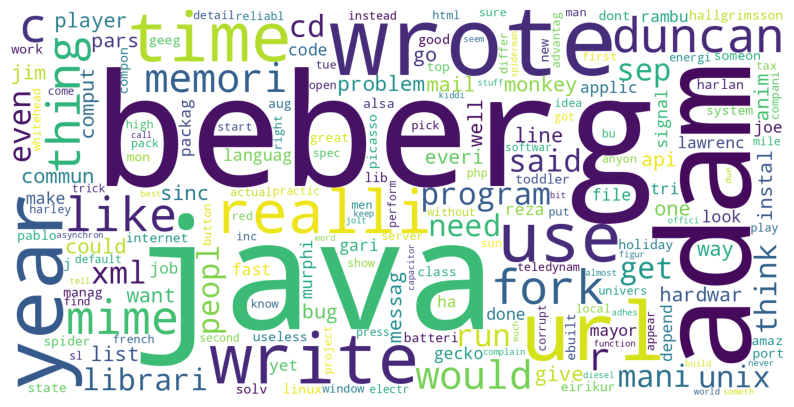

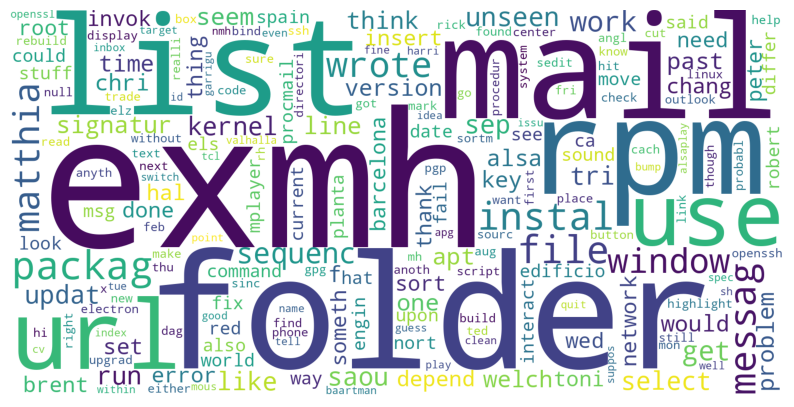

In [150]:
fig, ax = plt.subplots(figsize=(10,10), dpi=100)
ax.imshow(clust1_cloud)
ax.axis("off")
plt.savefig('wordcloud_miss_hamm_c1.png', dpi=100)
#ax.set_title('TFIDF weighted words \n Missclassified HAM (cluster 1)')
plt.show()

fig, ax = plt.subplots(figsize=(10,10), dpi=100)
ax.imshow(clust2_cloud)
ax.axis("off")
#ax.set_title('TFIDF weighted words \n Missclassified HAM (cluster 3)')
#fig.tight_layout()
plt.savefig('wordcloud_miss_hamm_c2.png', dpi=100)
plt.show()

## Wordclouds for each cluster

In [151]:
clust1_idx = np.where(kmeans_spec_assign==0)[0]
clust2_idx = np.where(kmeans_spec_assign==1)[0]
clust3_idx = np.where(kmeans_spec_assign==2)[0]

In [ ]:
for i, clust in enumerate([clust1_idx, clust2_idx, clust3_idx]):
    miss_classified = TDM.iloc[clust,:]
    clust_cloud = WordCloud(background_color="white", width=1600, height=800).generate_from_frequencies(miss_classified.T.sum(axis=1))
    
    fig, ax = plt.subplots(figsize=(10,10), dpi=100)
    ax.imshow(clust_cloud)
    ax.axis("off")
    #ax.set_title(f'TFIDF weighted words: cluster {i}')
    plt.savefig(f'wordcloud_cluster_{i+1}.png',dpi=100)
    plt.show()